# SC1015-Mini-Project

Lab: FCSG \
Group : 1 

## Group Members: 
1. Goh Jun Keat (U2320114E) 
2. Celeste Ho Shir Chee (U2322765G)
3. He QiXin (U2321190F)

## Project Description:
For our Introduction to Data Science and Artificial Intelligence module (SC1015) Mini Project, we performed analysis on the Data Science Salaries [dataset](https://www.kaggle.com/datasets/zain280/data-science-salaries) from Kaggle.

**Dataset:** [Data Science Salaries](https://www.kaggle.com/datasets/zain280/data-science-salaries) 
    
## Dataset Variables:
`id`: Numeric labels which document the number of respondents in numerical order depending on the submission of survey by respondent.

`work_year`: Numeric labels indicating the year of work when data was collected from the respondent.

`experience_level`: Information about the level of experience required or possessed by individuals in each role. This may include categories like entry-level, mid-level, senior-level, or years of experience in the field.

`employment_type`: Information about the type of employment by the individual. This may include categories like full-time, part-time, contract and freelance.
    
`job_title`: Descriptive labels indicating the specific position or role within the data science field, such as Data Scientist, Data Analyst, Machine Learning Engineer, etc.

`salary`: Numeric values representing the annual or monthly compensation for each position. 
    
`salary_currency`: Descriptive labels which indicate the currency of the `salary`.
    
`salary_in_usd`: Numeric values representing the `salary` in terms of United States Dollars (USD).
    
`employee_residence`: Geographic location where the individual resides, categorized by country.

`remote_ratio`: Numeric labels which indicate the degree of remoteness of the workplace of individuals. 

`company_location`: Geographic location where the job is based, categorized by country

`company_size`: Information about the size of the employing company, often categorized by the number of employees or revenue.


## Problem Statements:
**Main problem: Why are some Data Science professionals getting paid more than others?** 

*Potential Insights that can be obtained:* 
1. Distribution of salaries (USD) of Data Science professionals. 
2. The most popular Data Science Job and Job Category. 
3. The most popular destinations to work for Data Science professionals. 
4. Trend of Job Opportunities for Data Science field. 
5. Average employee salary (USD) by year.

## Table of Contents:
1. Data Preparation and Cleaning 
2. Exploratory Data Analysis (EDA) 
3. Data Modelling 
4. Conclusion


# Data Preparation and Cleaning

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Import Dataset

In [2]:
salary_data = pd.read_csv('data_salaries.csv')
salary_data

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
salary_data.shape

(607, 12)

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
salary_data.duplicated().sum()

0

In [6]:
salary_data.isna().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Pre-Cleaning Analysis

* There are `12` features/columns and `607` samples/rows in the dataset.    
* The response variable seems to be `salary` and `salary_in_usd`, while excluding `id` the remaining 9 are most likely predictors.     
* There are `5` variables identified as `int64` by default, and only 3 seem to be indeed Numeric, with `work_year` and `remote_ratio` likely being Categorical.    
* There are `7` variables identified as `object` by default, and they are most likely Categorical.      
* None of the features/columns seem to have any missing or `NaN` values.
* There are no duplicated values in the dataset.

---

## Data Cleaning

The cleaned dataset will be named `data_clean`

### Removal of Unnecessary Data

While looking through the dataset, we realised that some columns, like `id` were not needed in EDA.
We realised that there were different currencies involved for the salaries of employees, which can cause confusion while during comparison.
We also found that `employee_residence` has minimal effects on the salaries of employees.

Hence, we decided to remove `id`, `salary`, `salary_currency` and `employee_residence` for better presentation of data.

In [7]:
data_clean = salary_data.drop(columns = ['id', 'salary', 'salary_currency', 'employee_residence'])
data_clean

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


### Renaming of Values of Data

We renamed some values of data for better understanding: 
    
> In `experience_level`, convert [`EN`, `MI`, `SE`, `EX`] to [`Entry`, `Mid`, `Senior`, `Expert`] \
> In `employment_type`, convert [`PT`, `FT`, `CT`, `FL`] to [`Part-time`, `Full-time`, `Contract`, `Freelance`] \
> In `remote_ratio`, convert [`0`, `50`, `100`] to [`Not Remote`, `Partially Remote`, `Fully Remote`] \
> In `company_size`, convert [`S`, `M`, `L`] to [`Small`, `Medium`, `Large`] 

In [8]:
data_clean["experience_level"] = data_clean["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Entry", "Mid", "Senior", "Expert"])
data_clean["employment_type"] = data_clean["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"])
data_clean["remote_ratio"] = data_clean["remote_ratio"].replace([0, 50, 100], ["Not Remote", "Partially Remote", "Fully Remote"])
data_clean["company_size"] = data_clean["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"])
data_clean

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Not Remote,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Not Remote,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,Partially Remote,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Not Remote,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,Partially Remote,US,Large
...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,Fully Remote,US,Medium
603,2022,Senior,Full-time,Data Engineer,126000,Fully Remote,US,Medium
604,2022,Senior,Full-time,Data Analyst,129000,Not Remote,US,Medium
605,2022,Senior,Full-time,Data Analyst,150000,Fully Remote,US,Medium


### Addition of New Columns `job_category` and `above_median`

`job_category`: Descriptive labels indicating the general area of profession based on similarities in type of work for each `job_title`.
    
`above_median`: Descriptive labels indicating if the `salary_in_usd` of individuals is above the median salary (USD).

In [9]:
data_clean['job_title'].nunique()

50

There are `50` unique values for `job_title`

We categorized the different job titles into job categories for better clarity based on job scope \
The new column `job_category` was added to the dataset

In [10]:
job_category = {
    'Data Scientist': ['Data Scientist', 'Data Science Consultant','Lead Data Scientist', 'Principal Data Scientist','Data Science Manager','Head of Data Science', 'NLP Engineer', 'AI Scientist', 'Data Science Engineer', 'Staff Data Scientist', 'Applied Data Scientist', 'Director of Data Science'],
    'Data Analyst': ['Data Analyst', 'Data Analytics Manager','Data Analytics Lead', 'Head of Data','Data Architect', 'Product Data Analyst','Finance Data Analyst','Financial Data Analyst','Data Analytics Engineer', 'Business Data Analyst', 'Marketing Data Analyst', 'Lead Data Analyst', 'Principal Data Analyst', 'Analytics Engineer'],
    'Data Engineer': ['Data Engineer', 'Data Engineering Manager', 'ETL Developer', 'Cloud Data Engineer', 'Lead Data Engineer', 'Director of Data Engineering', 'Head of Data', 'Data Specialist', 'Data Architect','Principal Data Engineer' ],
    'Business Intelligence': ['BI Data Analyst', 'Business Intelligence Developer'],
    'Machine Learning Engineer': ['Machine Learning Engineer', 'ML Engineer','Applied Machine Learning Scientist', 'Head of Machine Learning', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Manager','Machine Learning Scientist' ],
    'Computer Vision Engineer':['3D Computer Vision Researcher','Computer Vision Software Engineer', 'Computer Vision Engineer'],
    'Big Data Engineer':['Big Data Engineer', 'Big Data Architect'],
    'Research and Development':['Research Scientist']
}

# New column
data_clean['job_category'] = data_clean['job_title'].map(lambda x: next((i for i, j in job_category.items() if x in j), 'Other'))

data_clean = data_clean.reindex(['work_year', 'experience_level', 'employment_type', 'job_title', 'job_category', 'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'], axis = 1)
data_clean

,work_year,experience_level,employment_type,job_title,job_category,salary_in_usd,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,Data Scientist,79833,Not Remote,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,Machine Learning Engineer,260000,Not Remote,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,Big Data Engineer,109024,Partially Remote,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,Data Analyst,20000,Not Remote,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,Machine Learning Engineer,150000,Partially Remote,US,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,Data Engineer,154000,Fully Remote,US,Medium
603,2022,Senior,Full-time,Data Engineer,Data Engineer,126000,Fully Remote,US,Medium
604,2022,Senior,Full-time,Data Analyst,Data Analyst,129000,Not Remote,US,Medium
605,2022,Senior,Full-time,Data Analyst,Data Analyst,150000,Fully Remote,US,Medium


Create a new column `above_median` as our goal is to predict if `salary_in_usd` of employee in data science profession is above median. 

Note: **Median value used** to determine `above_median` is the median value **before removal of outliers.**

In [11]:
median = data_clean['salary_in_usd'].median()
median

101570.0

> Median `salary_in_usd` is `101570.0`

In [12]:
salary = data_clean['salary_in_usd']
median = 101570.0                        #Based on raw data

condition = [
    (salary > median),
    (salary <= median),
]

above_median = [
    'Yes',
    'No',
]

# New column
data_clean['above_median'] = np.select(condition, above_median, 'Error')

data_clean = data_clean.reindex(['work_year', 'experience_level', 'employment_type', 'job_title', 'job_category', 'salary_in_usd', 'above_median', 'remote_ratio', 'company_location', 'company_size'], axis = 1)
data_clean

,work_year,experience_level,employment_type,job_title,job_category,salary_in_usd,above_median,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,Data Scientist,79833,No,Not Remote,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,Machine Learning Engineer,260000,Yes,Not Remote,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,Big Data Engineer,109024,Yes,Partially Remote,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,Data Analyst,20000,No,Not Remote,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,Machine Learning Engineer,150000,Yes,Partially Remote,US,Large
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,Data Engineer,154000,Yes,Fully Remote,US,Medium
603,2022,Senior,Full-time,Data Engineer,Data Engineer,126000,Yes,Fully Remote,US,Medium
604,2022,Senior,Full-time,Data Analyst,Data Analyst,129000,Yes,Not Remote,US,Medium
605,2022,Senior,Full-time,Data Analyst,Data Analyst,150000,Yes,Fully Remote,US,Medium


In [13]:
data_clean.shape

(607, 10)

In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   job_category      607 non-null    object
 5   salary_in_usd     607 non-null    int64 
 6   above_median      607 non-null    object
 7   remote_ratio      607 non-null    object
 8   company_location  607 non-null    object
 9   company_size      607 non-null    object
dtypes: int64(2), object(8)
memory usage: 47.6+ KB


### Post-Cleaning Analysis

After Data Cleaning: 

* There are `10` features/columns and `607` samples/rows in the dataset.    
* The response variable is `above_median`, while remaining 9 are most likely predictors.     
* There are `2` variables identified as `int64` by default, and only `salary_in_usd` being indeed Numeric, with `work_year` likely being Categorical.    
* There are `7` variables identified as `object` by default, and they are most likely Categorical.      

---

# Exploratory Data Analysis (EDA)

In [15]:
data_clean.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [16]:
salary = pd.DataFrame(data_clean['salary_in_usd'])
salary

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000


In [17]:
salary.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


<Axes: >

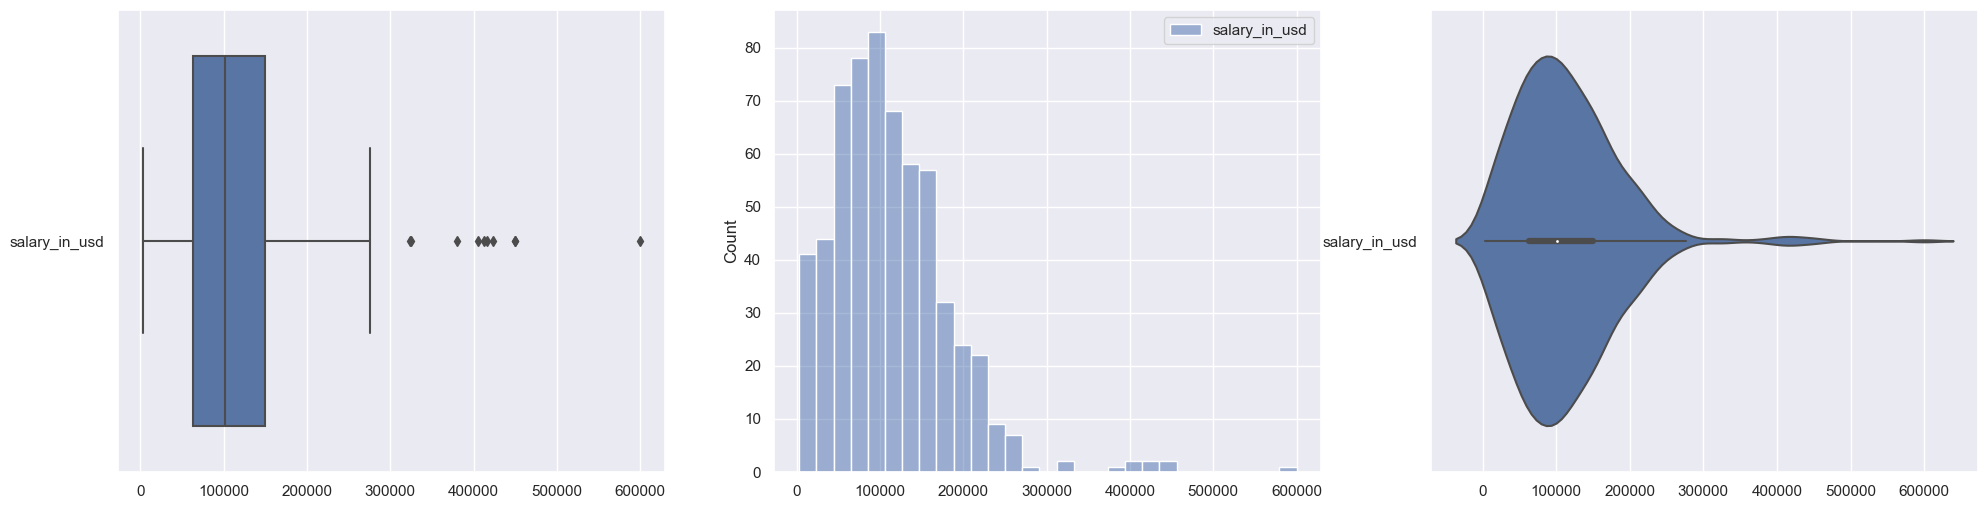

In [18]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = salary, orient = "h", ax = axes[0])
sb.histplot(data = salary, ax = axes[1])
sb.violinplot(data = salary, orient = "h", ax = axes[2])


Some **outliers** need to be removed. However, we shall remove them after exploring:

* Distribution of `salary_in_usd` based on `job_title`.
* The most popular `job_title` of each `work_year`.
* The most popular `job_category` of each `work_year`.
* The top 10 most popular data science related `company_location`.
* The trend of job opportunities by `work_year` in data science field.

### Distribution of `salary_in_usd` based on `job_title`

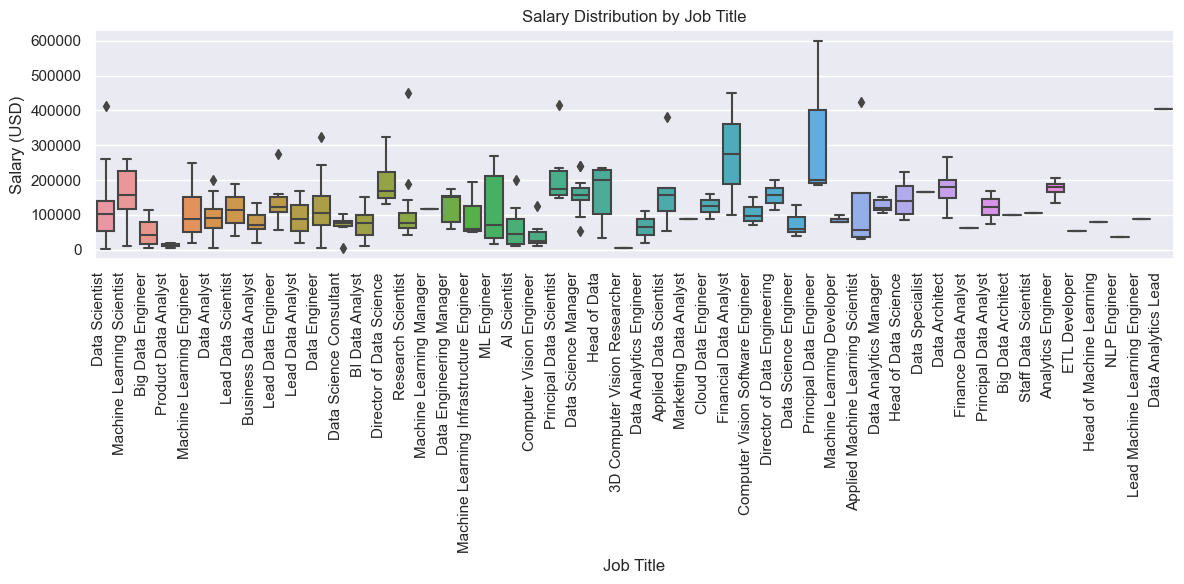

In [19]:
plt.figure(figsize=(12, 6))
sb.boxplot(data = data_clean, x = 'job_title', y = 'salary_in_usd')
plt.title('Salary Distribution by Job Title')
plt.xticks(rotation = 90, ha ='right')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

Excluding outliers:
    
> `Finantial Data Analyst` seems to be the `job_title` with the highest median `salary_in_usd`. \
> `Principle Data Engineer` seems to have the highest minimum `salary_in_usd`.

### The most popular `job_title` of each `work_year`

work_year  job_title                 
2020       AI Scientist                  1
           BI Data Analyst               1
           Big Data Engineer             3
           Business Data Analyst         2
           Computer Vision Engineer      1
                                        ..
2022       Machine Learning Scientist    3
           NLP Engineer                  1
           Principal Data Analyst        1
           Principal Data Scientist      1
           Research Scientist            4
Length: 98, dtype: int64


C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


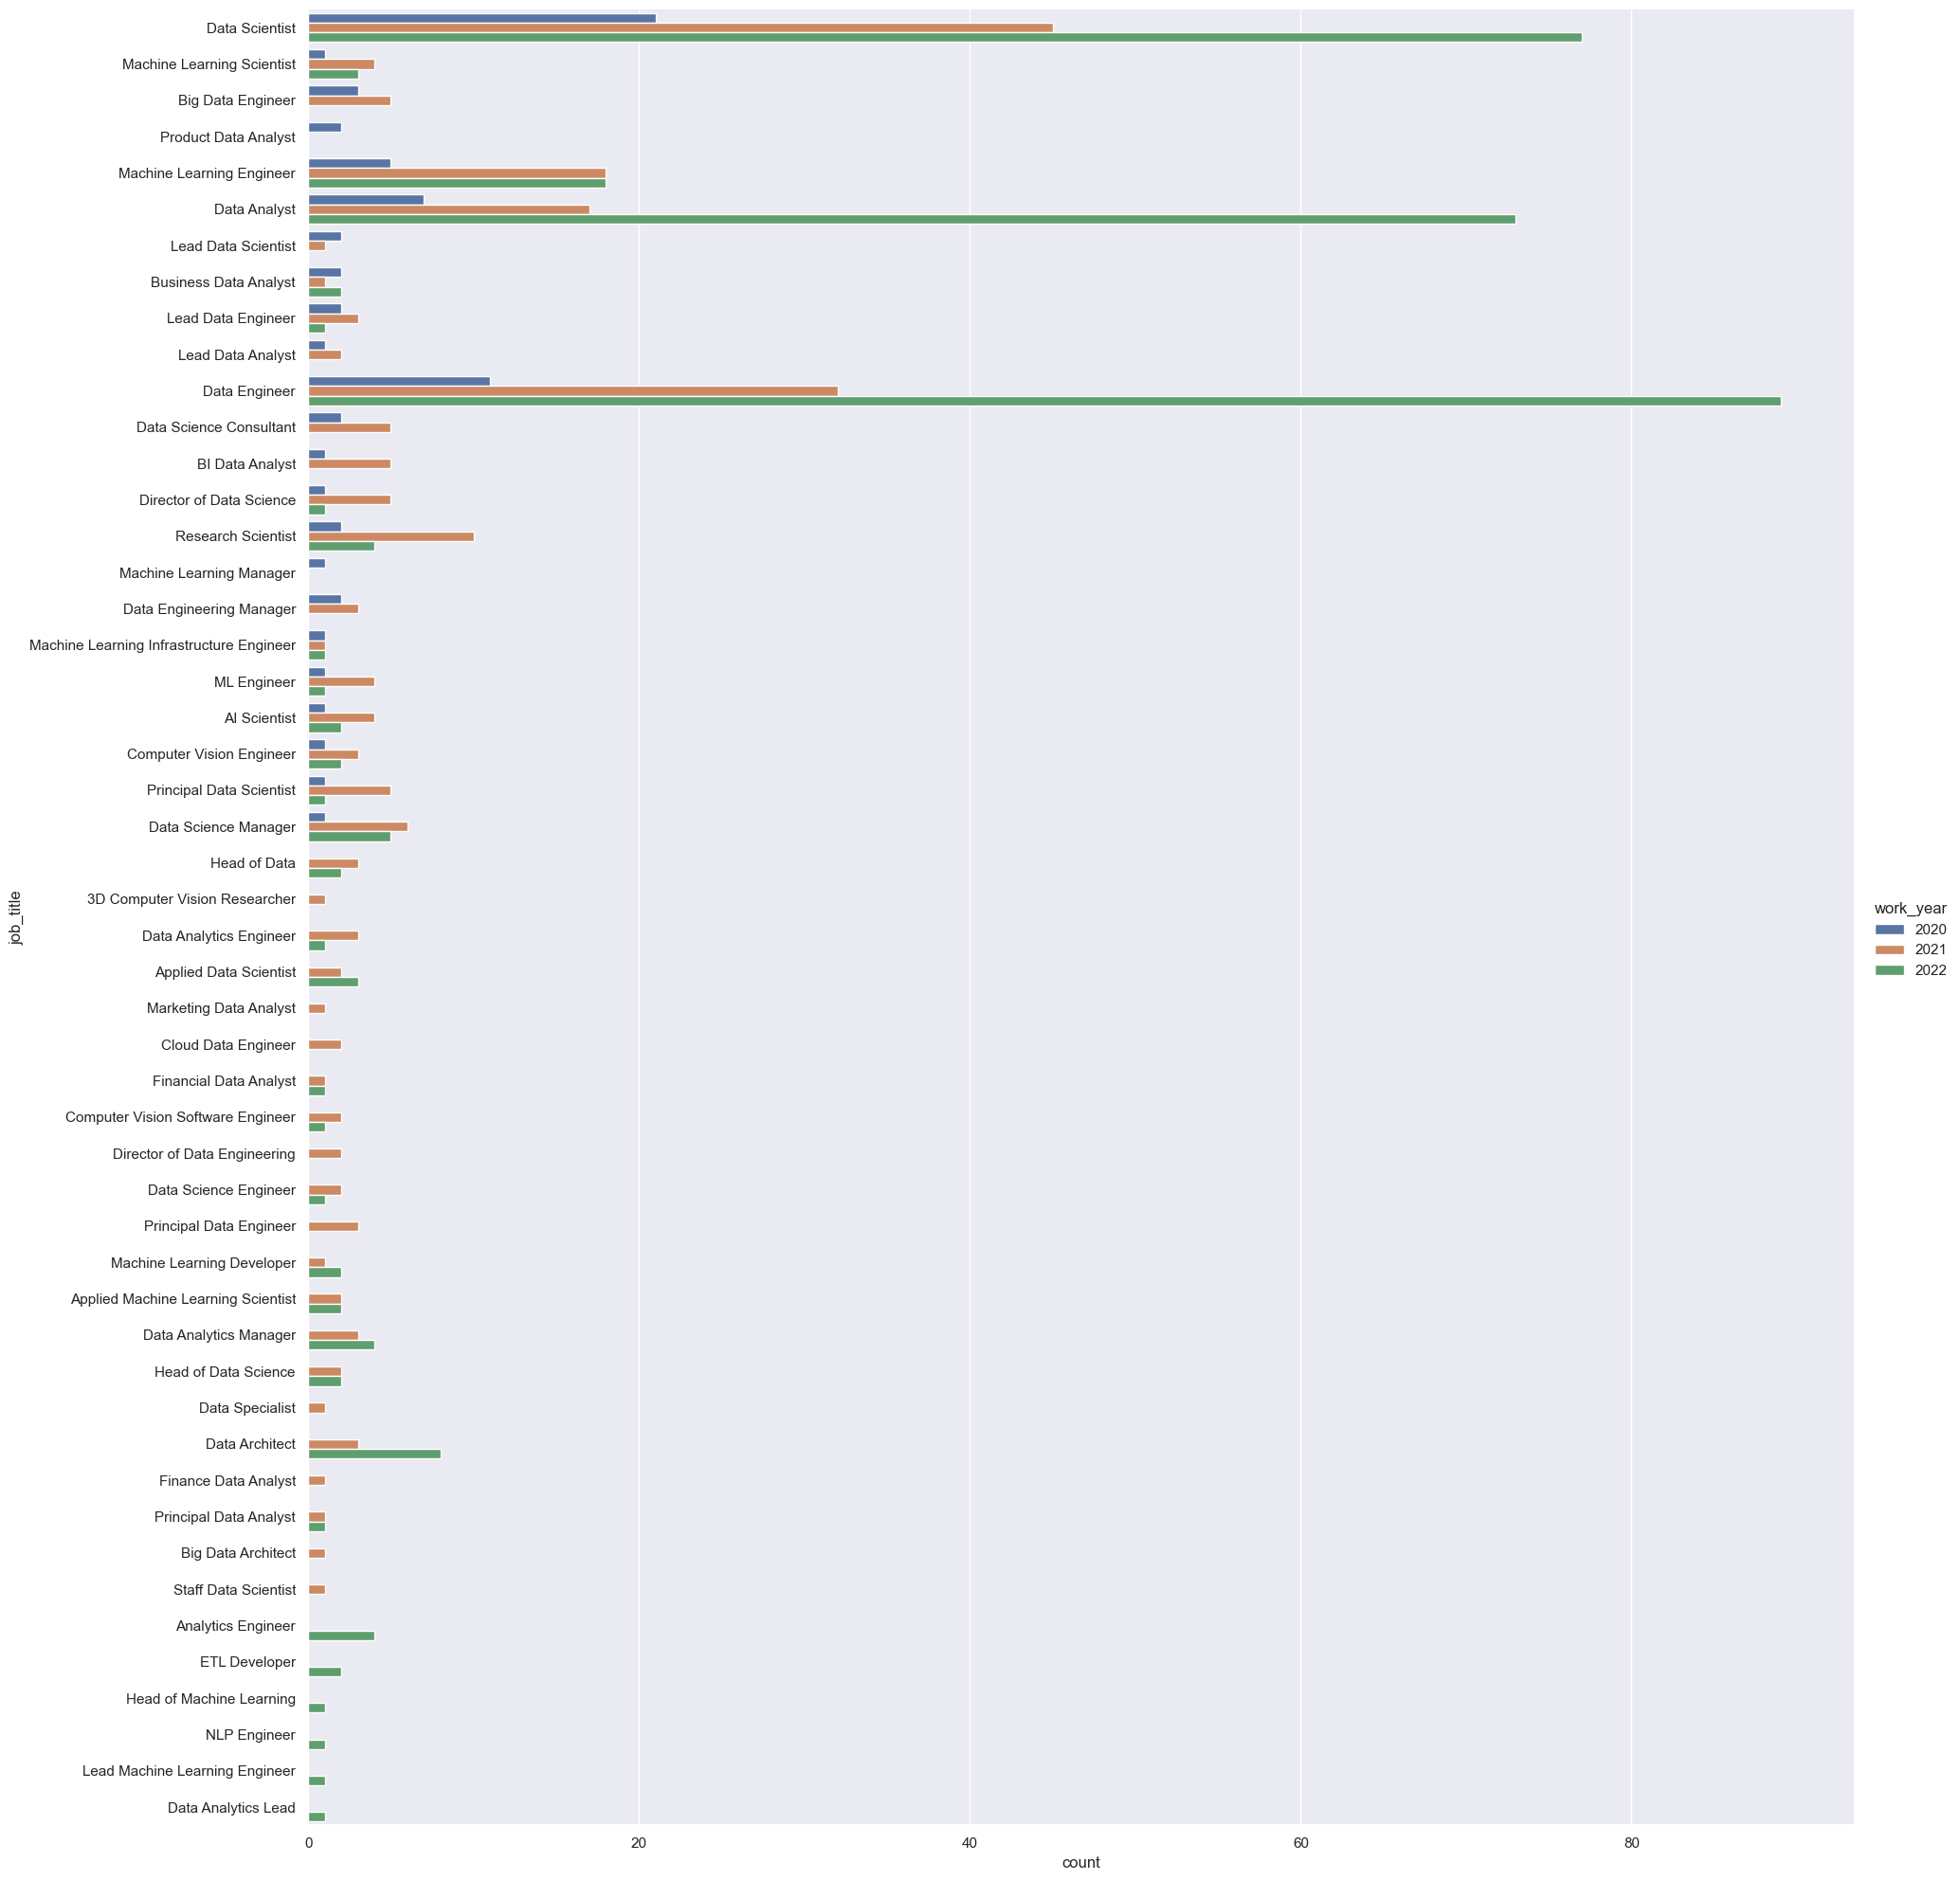

In [20]:
print(data_clean.groupby(['work_year','job_title']).size())
sb.catplot(data = data_clean, kind = "count", y = "job_title", hue = "work_year", height = 20, aspect = 1)

> The most popular `job_title` in `2020` and `2021` was `Data Scientist` \
> The most popular `job_title` in `2022` was `Data Engineer`

### The most popular `job_category` of each `work_year`

work_year  job_category             
2020       Big Data Engineer             3
           Business Intelligence         1
           Computer Vision Engineer      1
           Data Analyst                 12
           Data Engineer                15
           Data Scientist               29
           Machine Learning Engineer     9
           Research and Development      2
2021       Big Data Engineer             6
           Business Intelligence         5
           Computer Vision Engineer      6
           Data Analyst                 36
           Data Engineer                46
           Data Scientist               78
           Machine Learning Engineer    30
           Research and Development     10
2022       Computer Vision Engineer      3
           Data Analyst                 97
           Data Engineer                92
           Data Scientist               93
           Machine Learning Engineer    29
           Research and Development      4
dtype: int64


C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


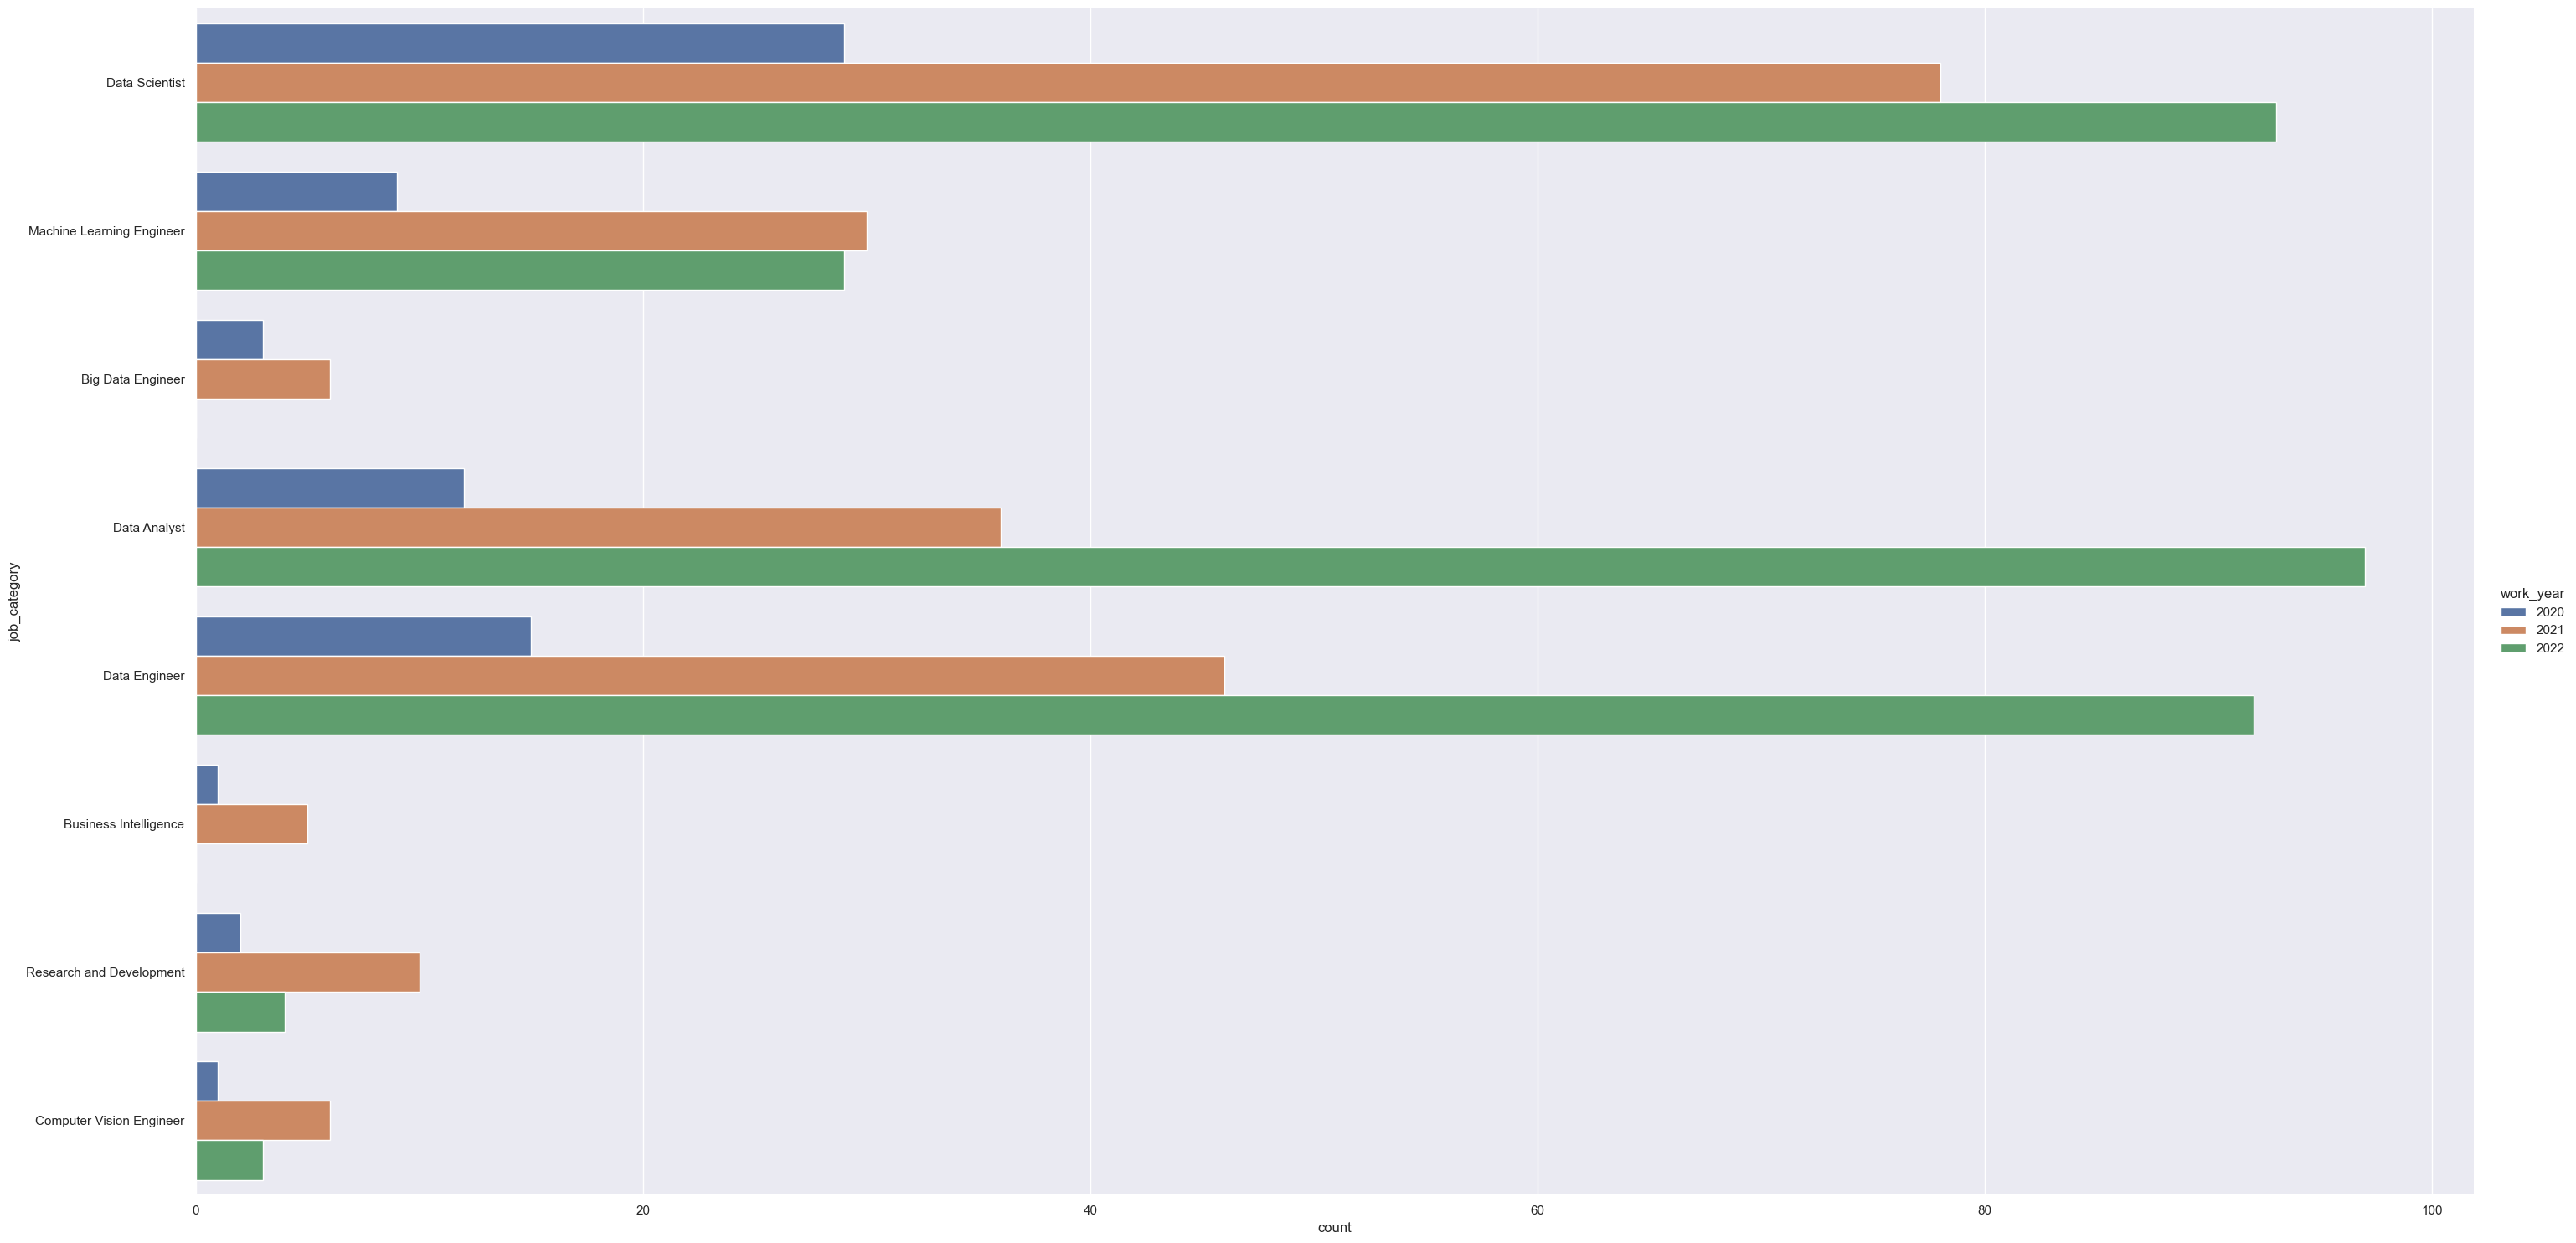

In [21]:
print(data_clean.groupby(['work_year','job_category']).size())
sb.catplot(data = data_clean, kind = "count", y = "job_category", hue = "work_year", height = 15, aspect = 2)

> The most popular `job_category` in `2020` and `2021` was `Data Scientist` \
> The most popular `job_category` in `2022` was `Data Analyst`

### The top 10 most popular data science related `company_location`

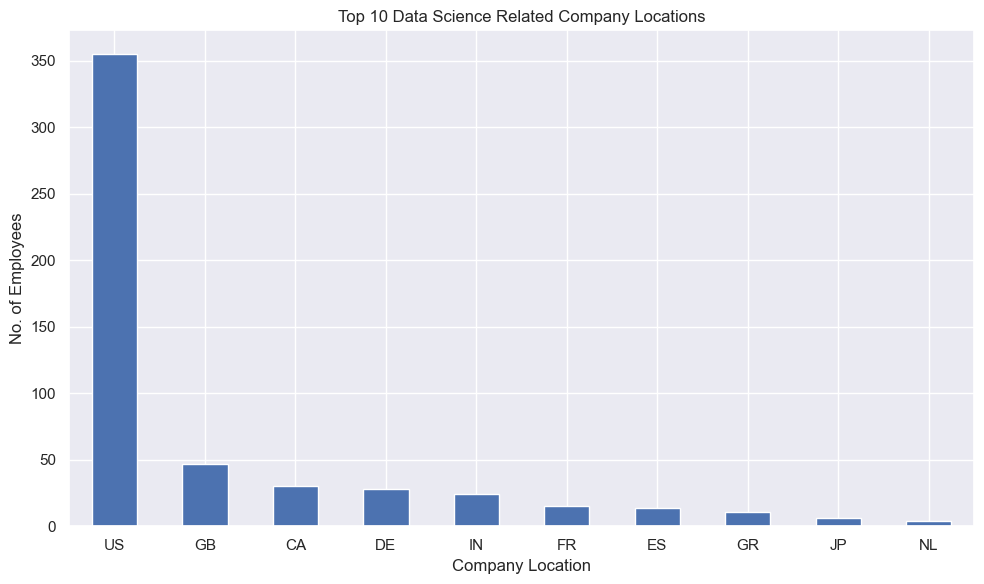

In [22]:
# Top 10 data science related company locations
top_company_loc = data_clean['company_location'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_company_loc.plot(kind = 'bar')
plt.title('Top 10 Data Science Related Company Locations')
plt.xlabel('Company Location')
plt.ylabel('No. of Employees')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

* The **top 10 Locations of Data Science Companies** (in descending order) are: 
    1. USA (US) 
    2. Great Britain (GB) 
    3. Canada (CA) 
    4. Denmark (DE) 
    5. India (IN) 
    6. France (FR) 
    7. Spain (ES) 
    8. Greece (GR) 
    9. Japan (JP) 
    10. Netherlands (NL) 

> Most employees working in the field of data science work in companies in `company_location` stated above.

### The trend of job opportunities by `work_year` in data science field

In [23]:
yr = pd.DataFrame(data_clean['work_year'])
yr

,work_year
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
602,2022
603,2022
604,2022
605,2022


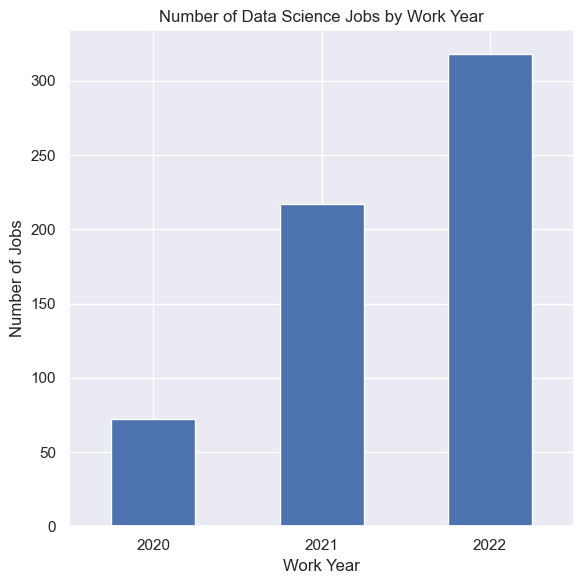

In [24]:
# Count the number of jobs for each work year
jobs_by_year = yr['work_year'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(6, 6))
jobs_by_year.plot(kind='bar')
plt.title('Number of Data Science Jobs by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [25]:
yr.value_counts()

work_year
2022         318
2021         217
2020          72
Name: count, dtype: int64

There is an increasing number of job opportuinities in the Data Science field from `2020` to `2022`.

### Removal of Outliers

We will now remove the outliers in the data.

In [26]:
q1 = data_clean['salary_in_usd'].quantile(0.25)
q3 = data_clean['salary_in_usd'].quantile(0.75)
IQR = q3 - q1

lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

upper_arr = np.where(data_clean['salary_in_usd'] > upper)[0]
lower_arr = np.where(data_clean['salary_in_usd'] < lower)[0]

data_clean.drop(index = upper_arr, inplace = True)
data_clean.drop(index = lower_arr, inplace = True)
data_clean

,work_year,experience_level,employment_type,job_title,job_category,salary_in_usd,above_median,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,Data Scientist,79833,No,Not Remote,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,Machine Learning Engineer,260000,Yes,Not Remote,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,Big Data Engineer,109024,Yes,Partially Remote,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,Data Analyst,20000,No,Not Remote,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,Machine Learning Engineer,150000,Yes,Partially Remote,US,Large
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,Data Engineer,154000,Yes,Fully Remote,US,Medium
603,2022,Senior,Full-time,Data Engineer,Data Engineer,126000,Yes,Fully Remote,US,Medium
604,2022,Senior,Full-time,Data Analyst,Data Analyst,129000,Yes,Not Remote,US,Medium
605,2022,Senior,Full-time,Data Analyst,Data Analyst,150000,Yes,Fully Remote,US,Medium


<Axes: >

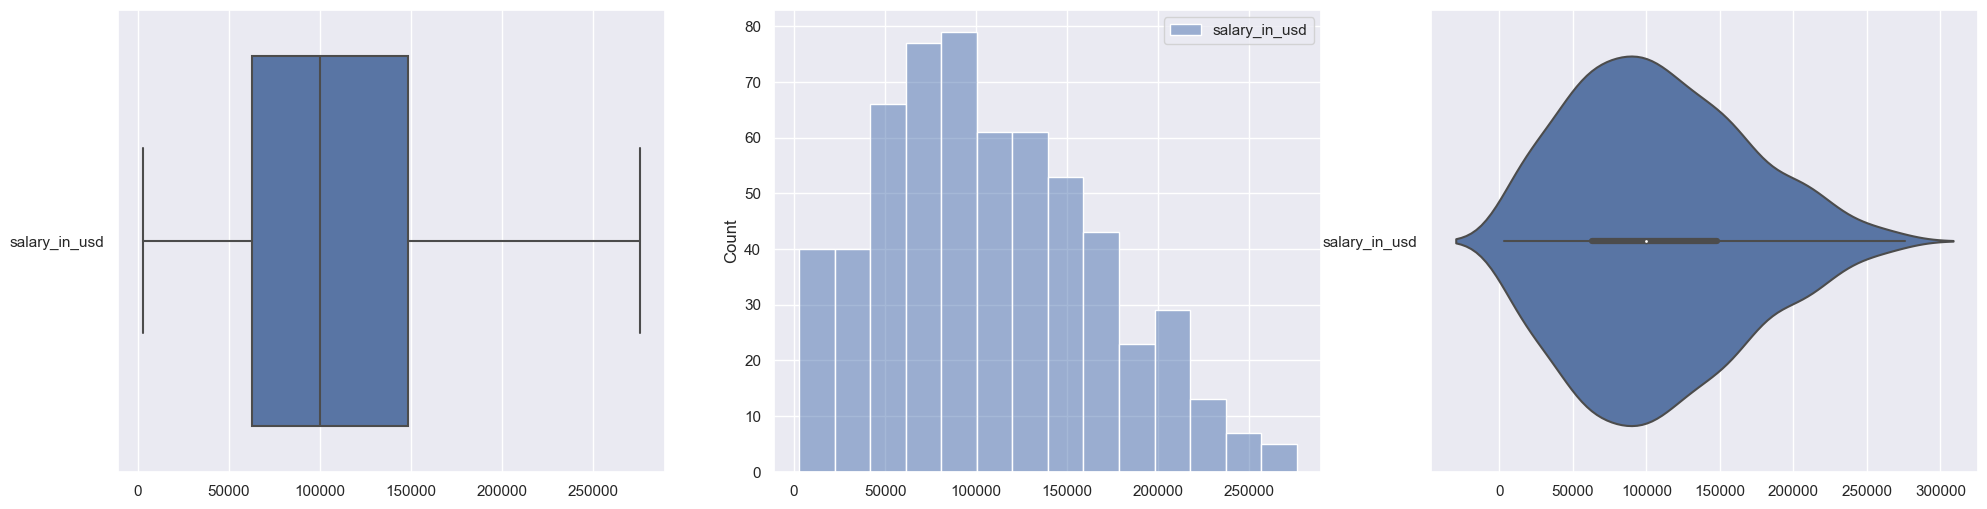

In [70]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = salary, orient = "h", ax = axes[0])
sb.histplot(data = salary, ax = axes[1])
sb.violinplot(data = salary, orient = "h", ax = axes[2])

In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 606
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         597 non-null    int64 
 1   experience_level  597 non-null    object
 2   employment_type   597 non-null    object
 3   job_title         597 non-null    object
 4   job_category      597 non-null    object
 5   salary_in_usd     597 non-null    int64 
 6   above_median      597 non-null    object
 7   remote_ratio      597 non-null    object
 8   company_location  597 non-null    object
 9   company_size      597 non-null    object
dtypes: int64(2), object(8)
memory usage: 51.3+ KB


After removal of outliers, there are `597` rows and `9` columns left in the data.

### Distribution of Responding Variable `above_median`

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


above_median
No     304
Yes    293
Name: count, dtype: int64

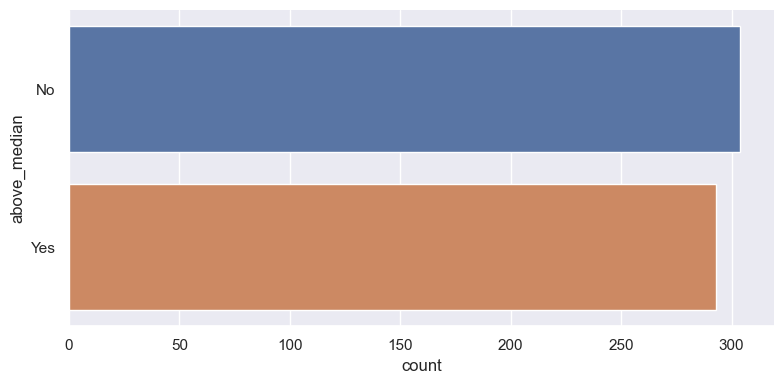

In [29]:
#Number of employee salaries (USD) that are above median
#Median = 101570.0
sb.catplot(y = 'above_median', data = data_clean, kind = "count", height = 4, aspect = 2)
data_clean['above_median'].value_counts()

> The distribution is quite balanced. \
> There are more employees receiving below median salaries (USD) than those receiving above median salaries (USD).

Note: **Median value used** to determine `above_median` is the median value **before removal of outliers.**

### Average `salary_in_usd` by `work_year`

In [30]:
salary = pd.DataFrame(data_clean['salary_in_usd'])
yr = pd.DataFrame(data_clean['work_year'])

joint = pd.concat([yr, salary], axis = 1).reindex(yr.index)
joint

,work_year,salary_in_usd
0,2020,79833
1,2020,260000
2,2020,109024
3,2020,20000
4,2020,150000
...,...,...
602,2022,154000
603,2022,126000
604,2022,129000
605,2022,150000


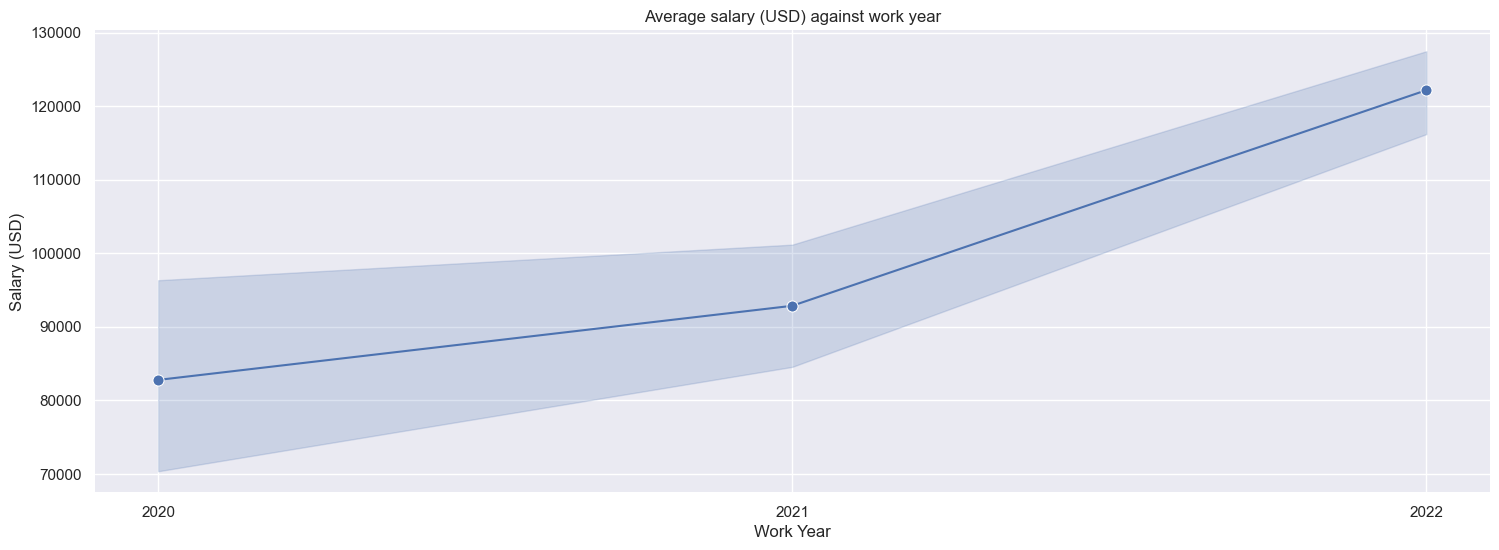

In [31]:
plt.figure(figsize = (18, 6))
joint = joint.sort_values(by = 'work_year')
ax = sb.lineplot(data = joint ,x = 'work_year', y = 'salary_in_usd', marker = 'o', markersize = 8 )
sb.despine(bottom = True, left = True)
plt.title('Average salary (USD) against work year')
plt.xticks([2020, 2021, 2022])
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.show()

> As seen in the above time series, there was a slight increase in the mean salary between `2020` to `2021`. However, there was a large increase between `2021` to `2022`, which may be because of the high number of job opportunities in `2021` and `2022`.

> Data Science Professionals become **increasingly popular** and **sought after by companies** as time passes.

Note: **Average salary (USD) used** is the average `salary_in_usd` value **after removal of outliers.**

---

### Distribution of Predictors

We are trying to find the best model to predict the whether the salary (USD) of employees in `above_median`. 

To do this, we must first find distribution of predictors against `salary_in_usd`. Potential predictors are `company_location`, `job_title`, `job_category`, `experience_level`, `employment_type`, `remote_ratio` and `company size`. 

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


company_location
US    345
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

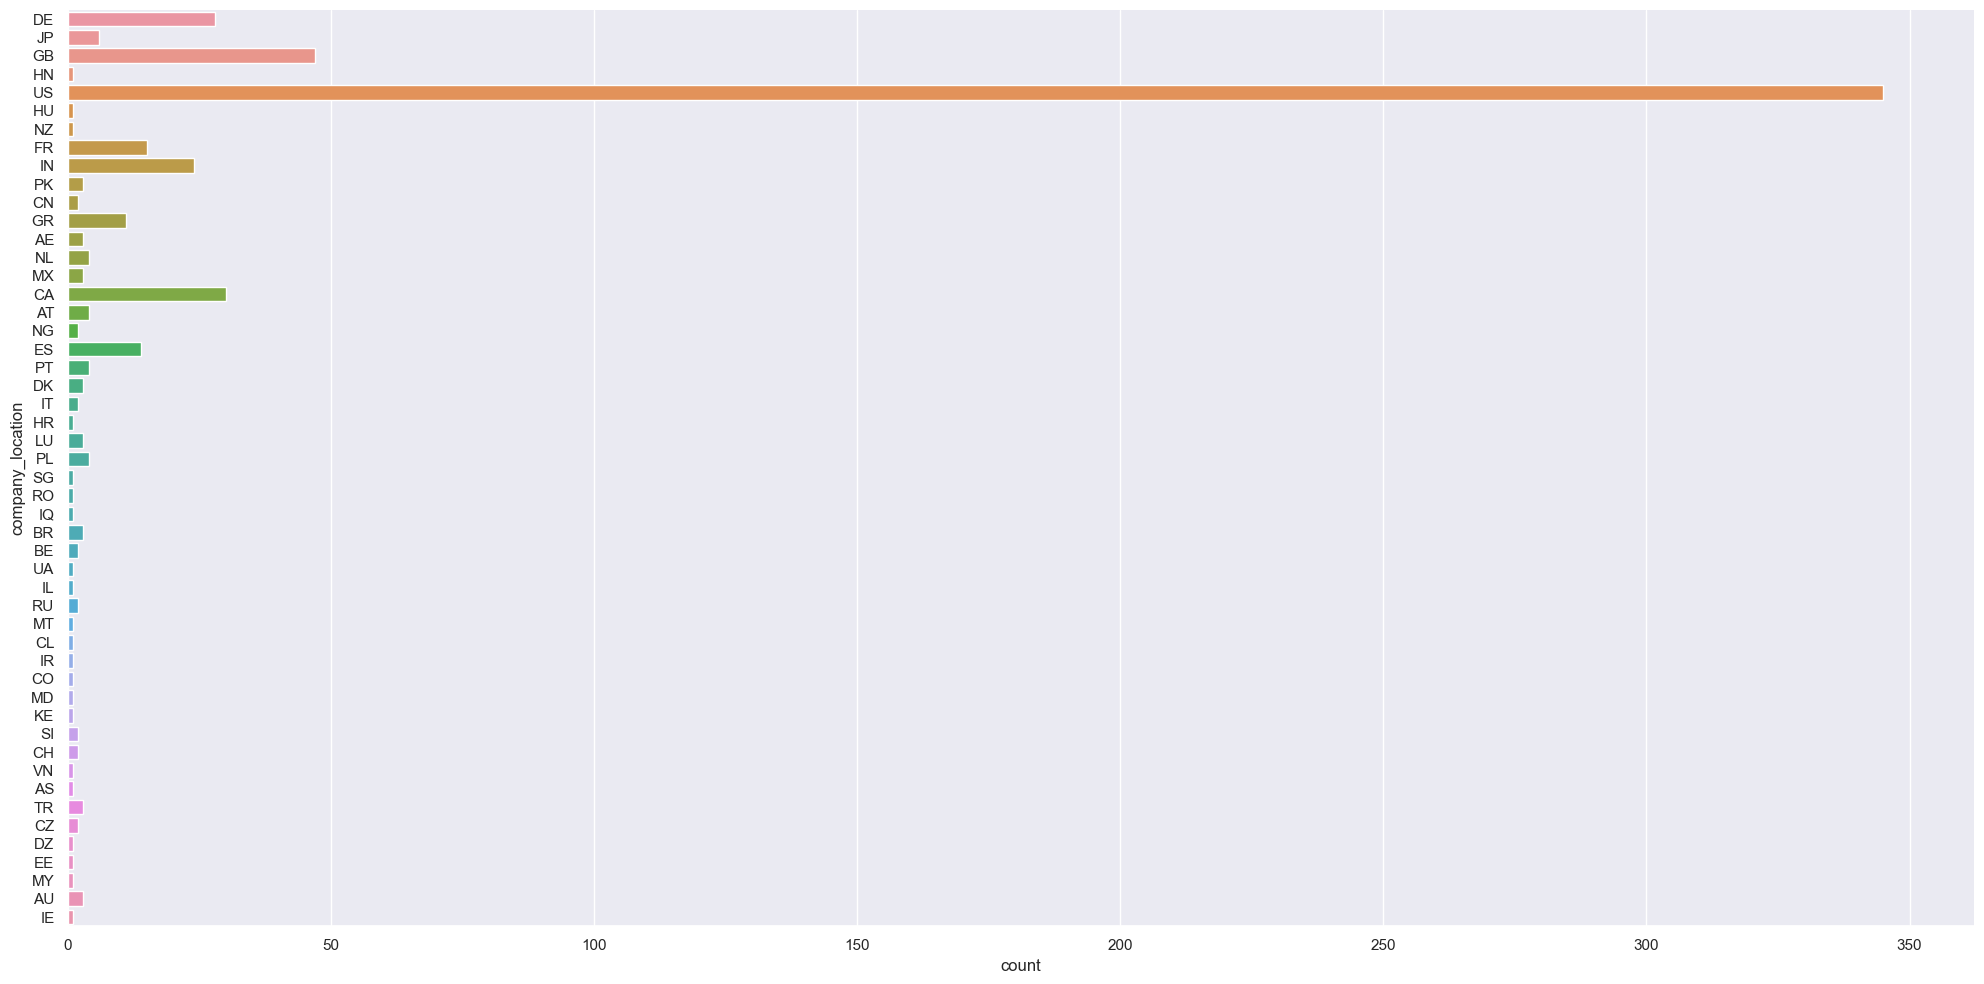

In [32]:
#Distribution of Company Location
sb.catplot(y = 'company_location', data = data_clean, kind = "count", height = 10, aspect = 2)
data_clean['company_location'].value_counts()

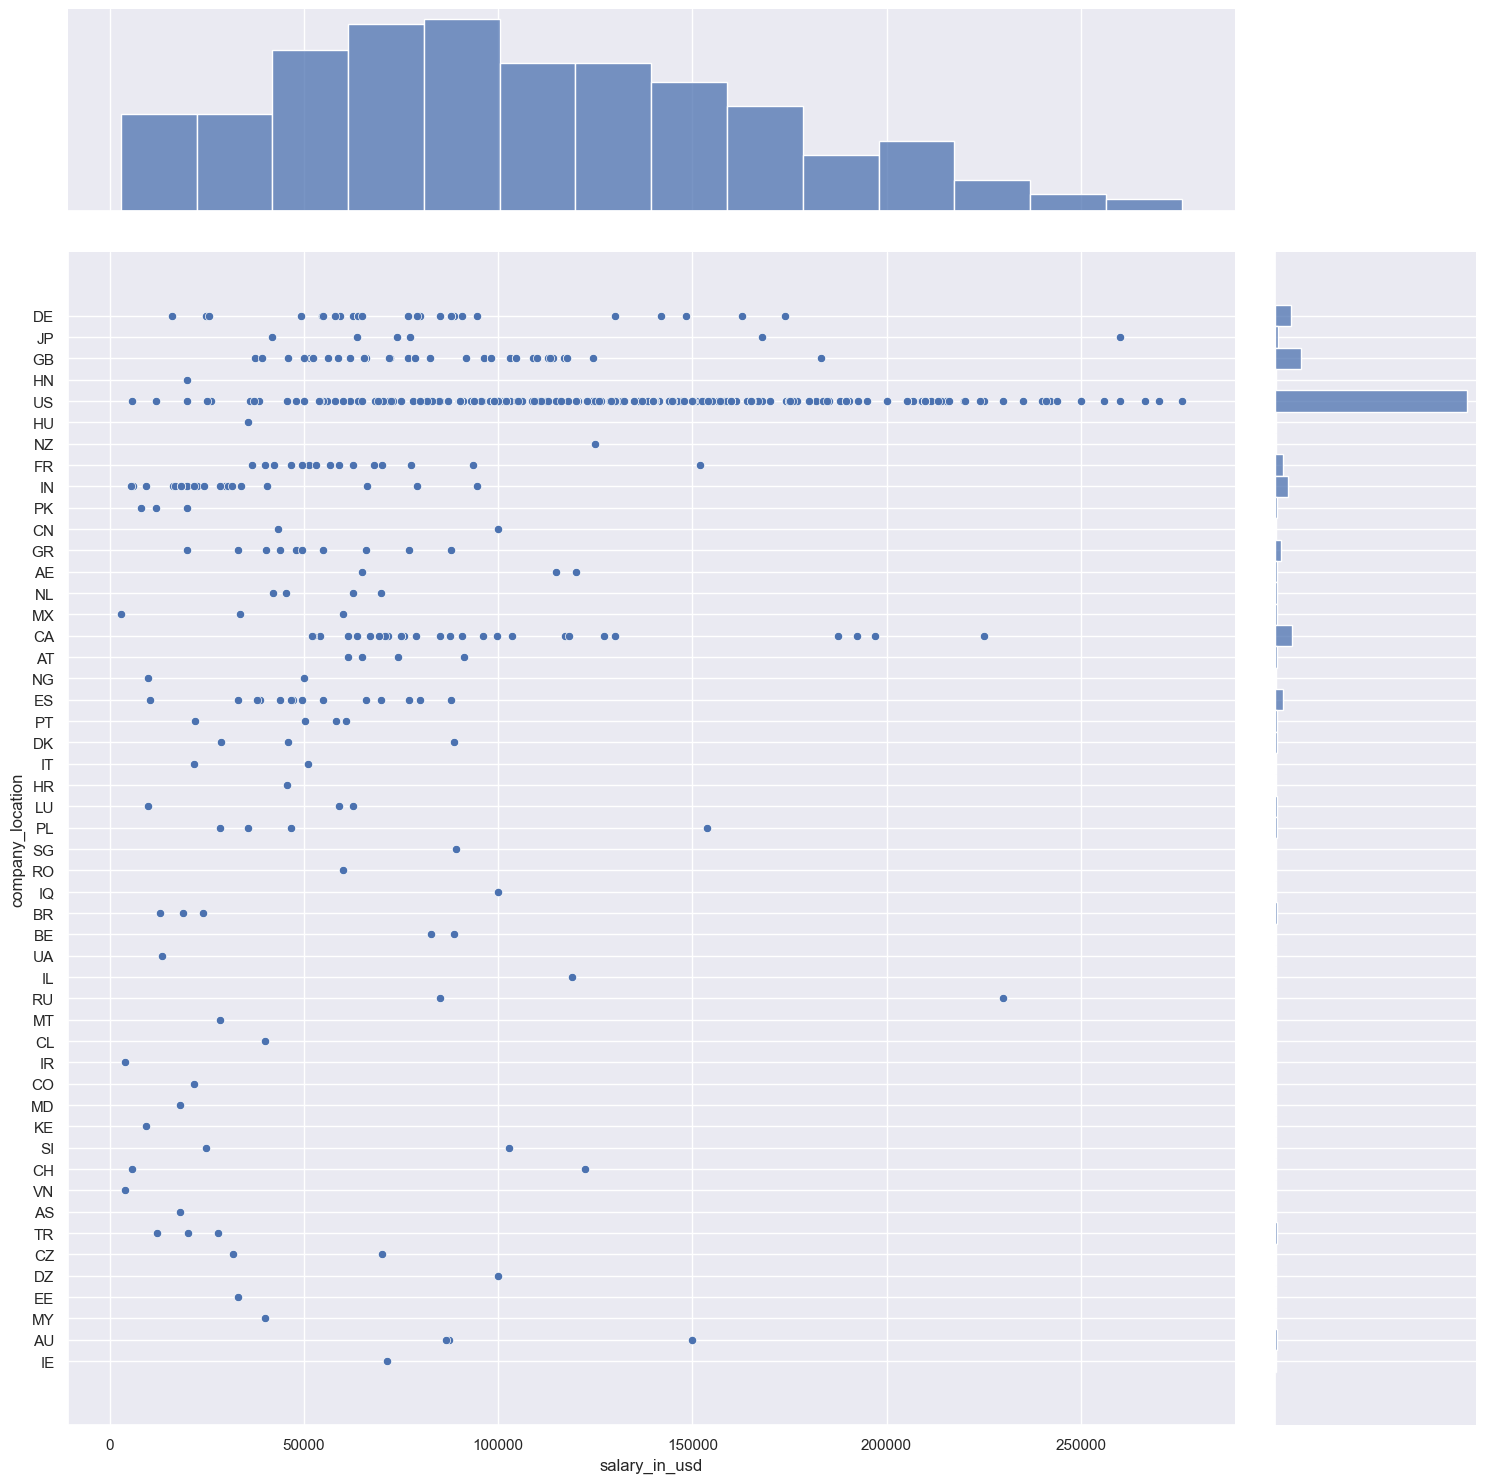

In [33]:
sb.jointplot(data = data_clean, x = "salary_in_usd", y = "company_location", height = 15)

In [34]:
data_clean['company_location'].nunique()

50

Data of the `company_location` of employees is skewed, with most of the `company_location` of employees (`345` out of `597`) being in `US`. \
There are too many (`50`) `company_location`, including some `company_location` only having `1` input. \
`job_title` is **not suitable** to be used as predictor of `salary_in_usd`.

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


job_title
Data Scientist                              142
Data Engineer                               131
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           15
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Data Science Consultant                       7
Data Analytics Manager                        7
Director of Data Science                      6
Principal Data Scientist                      6
Computer Vision Engineer                      6
ML Engineer                                   6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

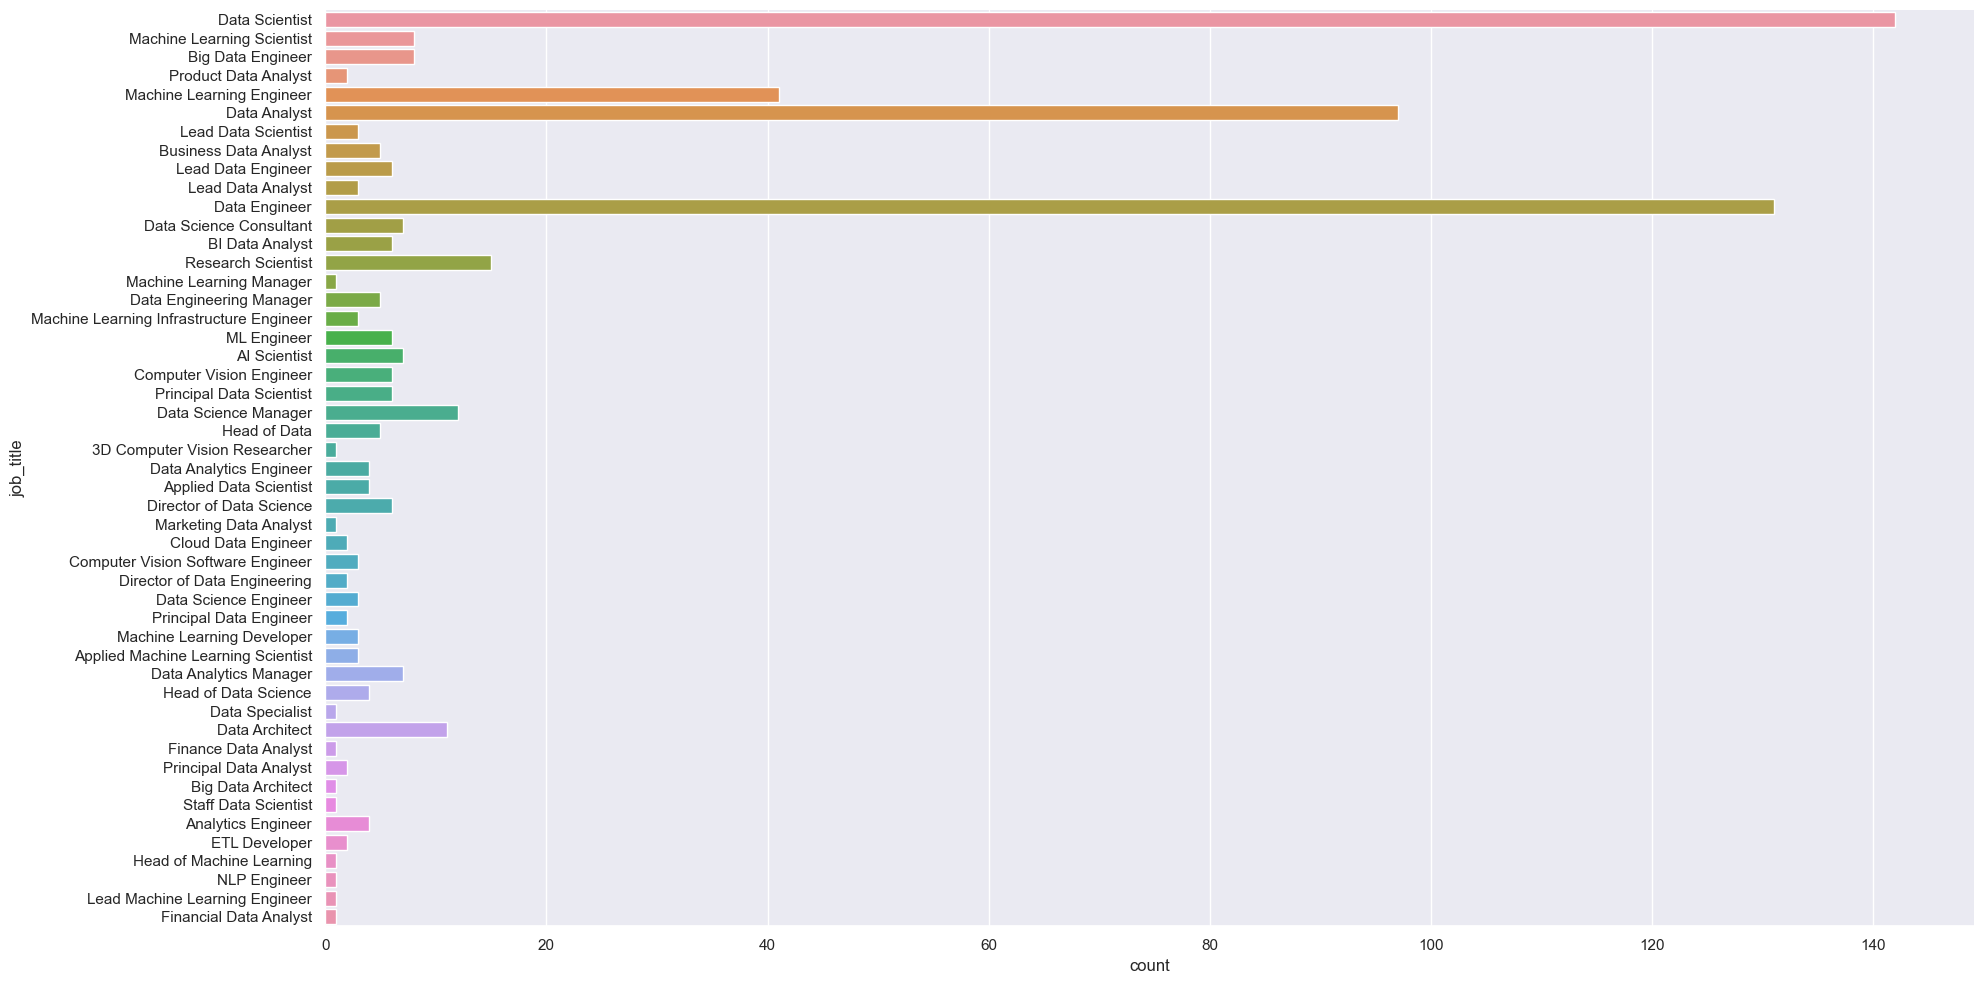

In [35]:
#Distribution of Job Title
sb.catplot(y = 'job_title', data = data_clean, kind = "count", height = 10, aspect = 2)
data_clean['job_title'].value_counts()

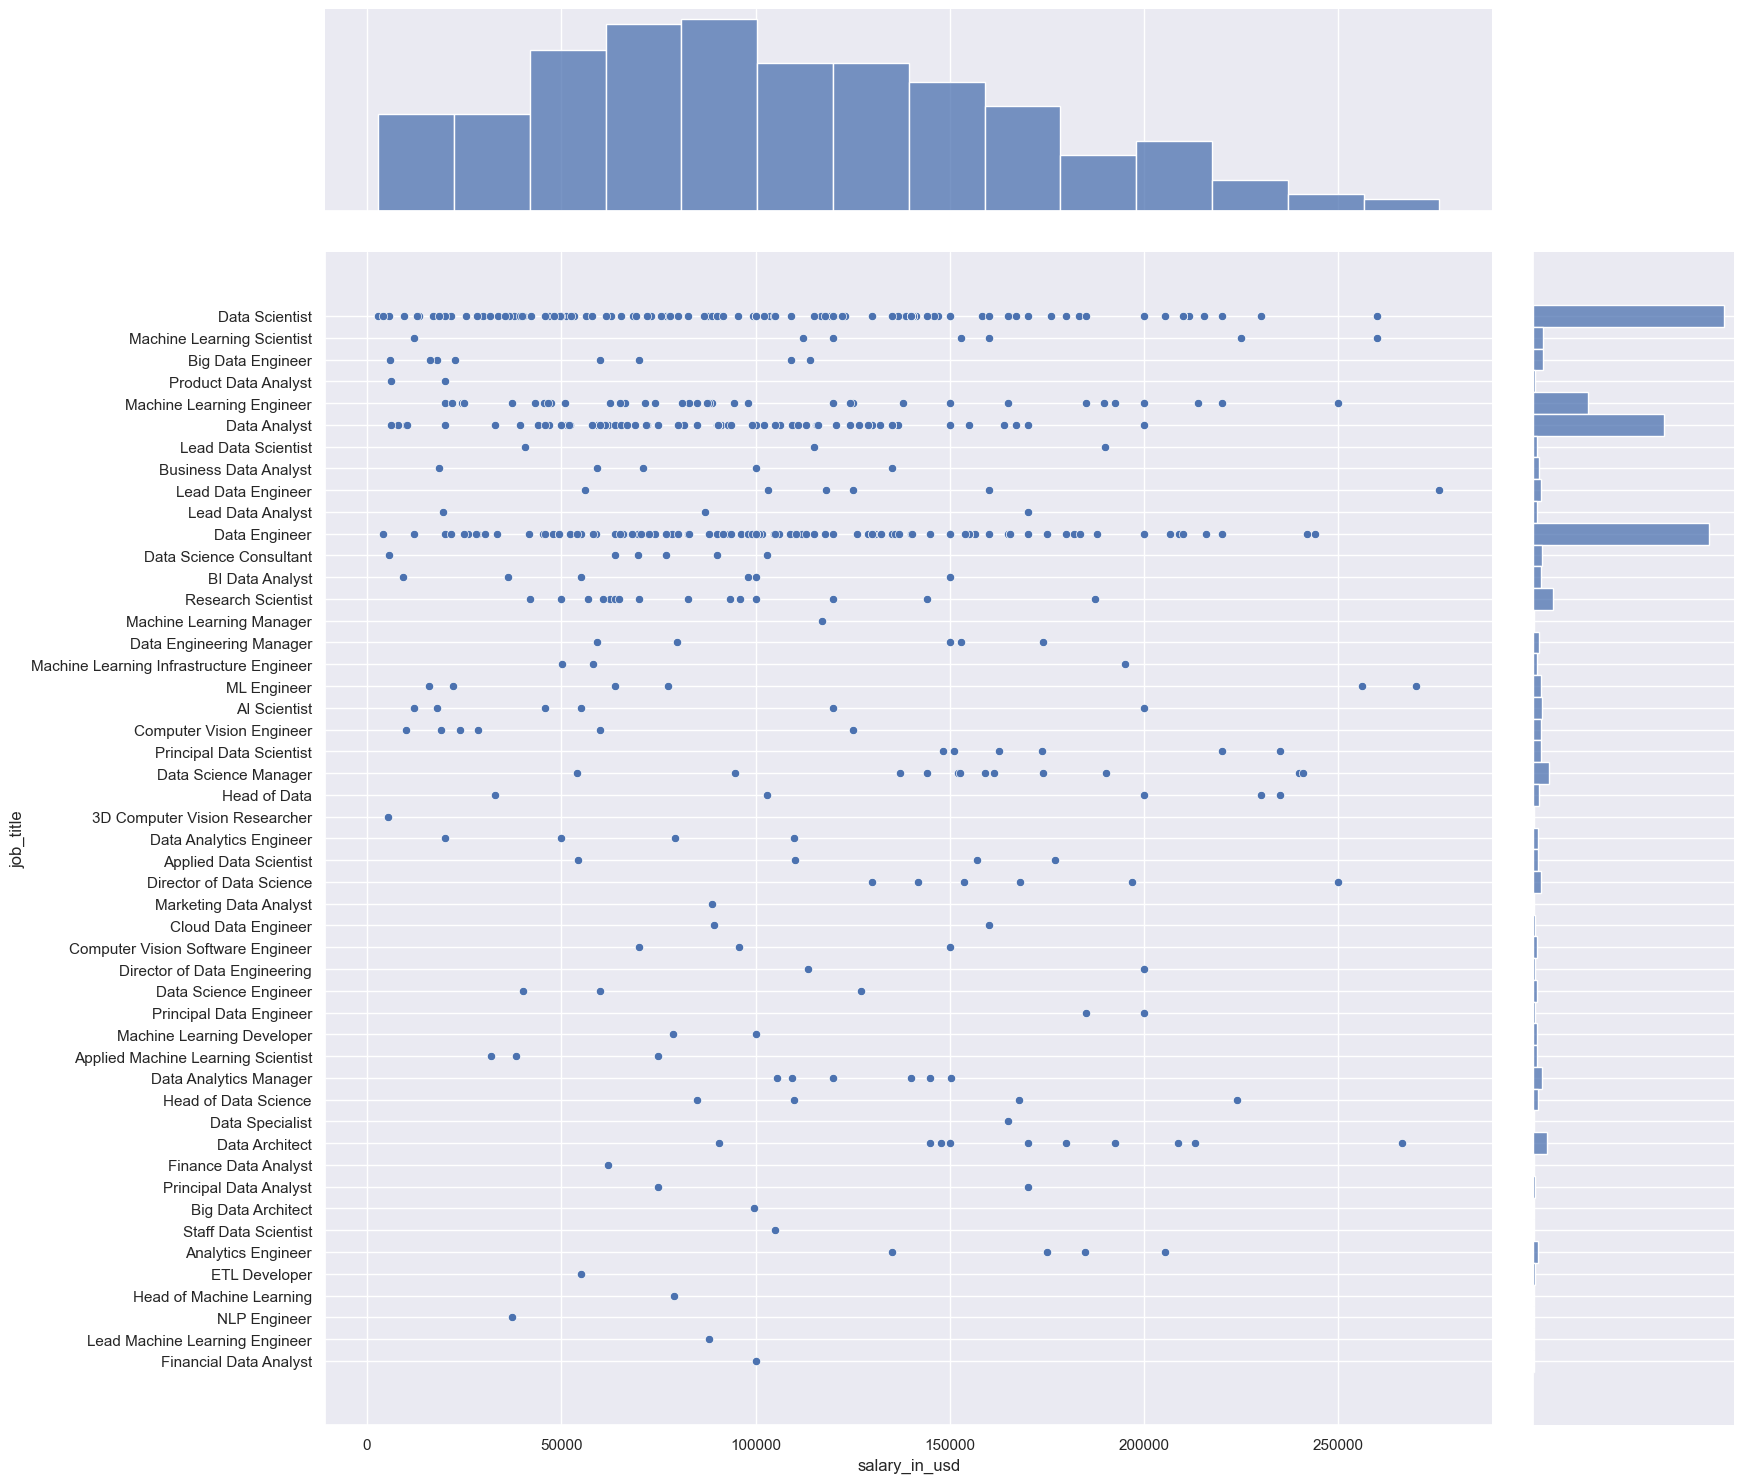

In [36]:
sb.jointplot(data = data_clean, x = "salary_in_usd", y = "job_title", height = 15)

In [37]:
data_clean['job_title'].nunique()

49

Data of the `job_title` of employees is too spread out, which may cause inaccuracies and skew during modelling. \
Some `job_title` only have `1` input. \
There are only `49` instead of `50` `job_title` remaining because `Data Analytics Lead` has been removed as its `salary_in_usd` is an outlier. \
`job_title` is **not suitable** to be used as predictor of `salary_in_usd`.

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


job_category
Data Scientist               196
Data Engineer                151
Data Analyst                 143
Machine Learning Engineer     67
Research and Development      15
Computer Vision Engineer      10
Big Data Engineer              9
Business Intelligence          6
Name: count, dtype: int64

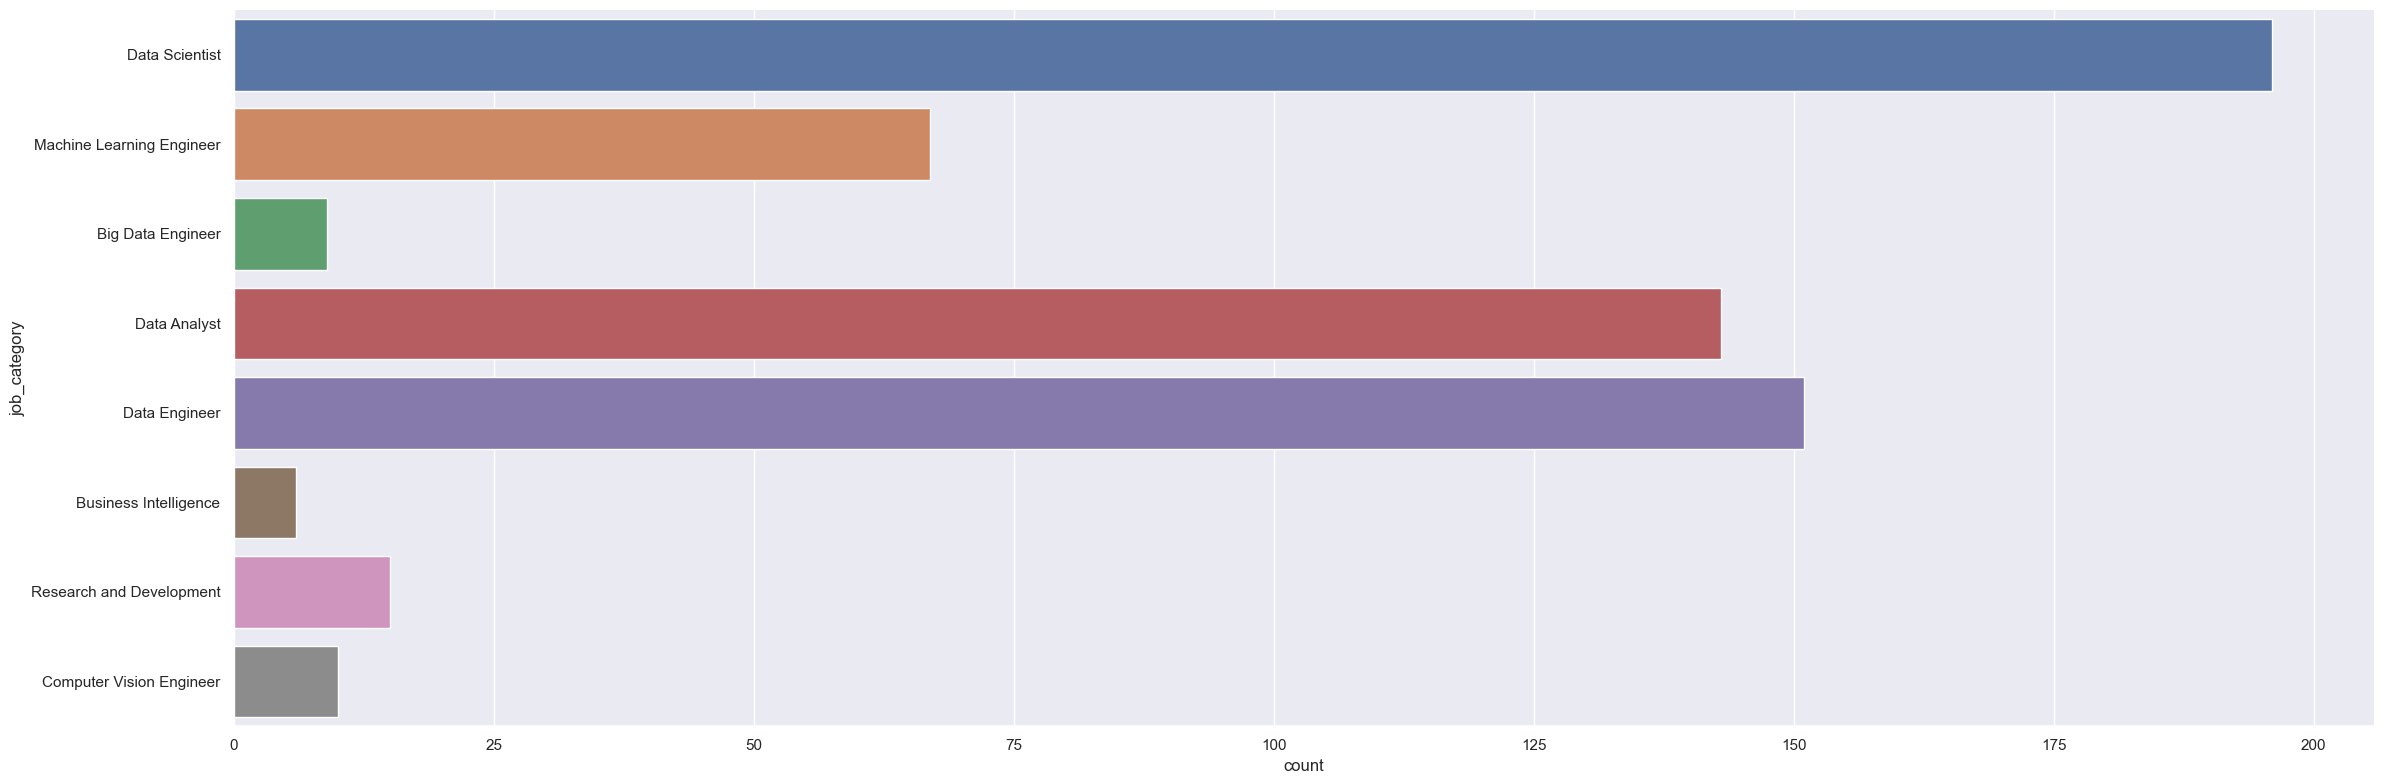

In [38]:
#Distribution of Job Category
sb.catplot(y = 'job_category', data = data_clean, kind = "count", height = 8, aspect = 3)
data_clean['job_category'].value_counts()

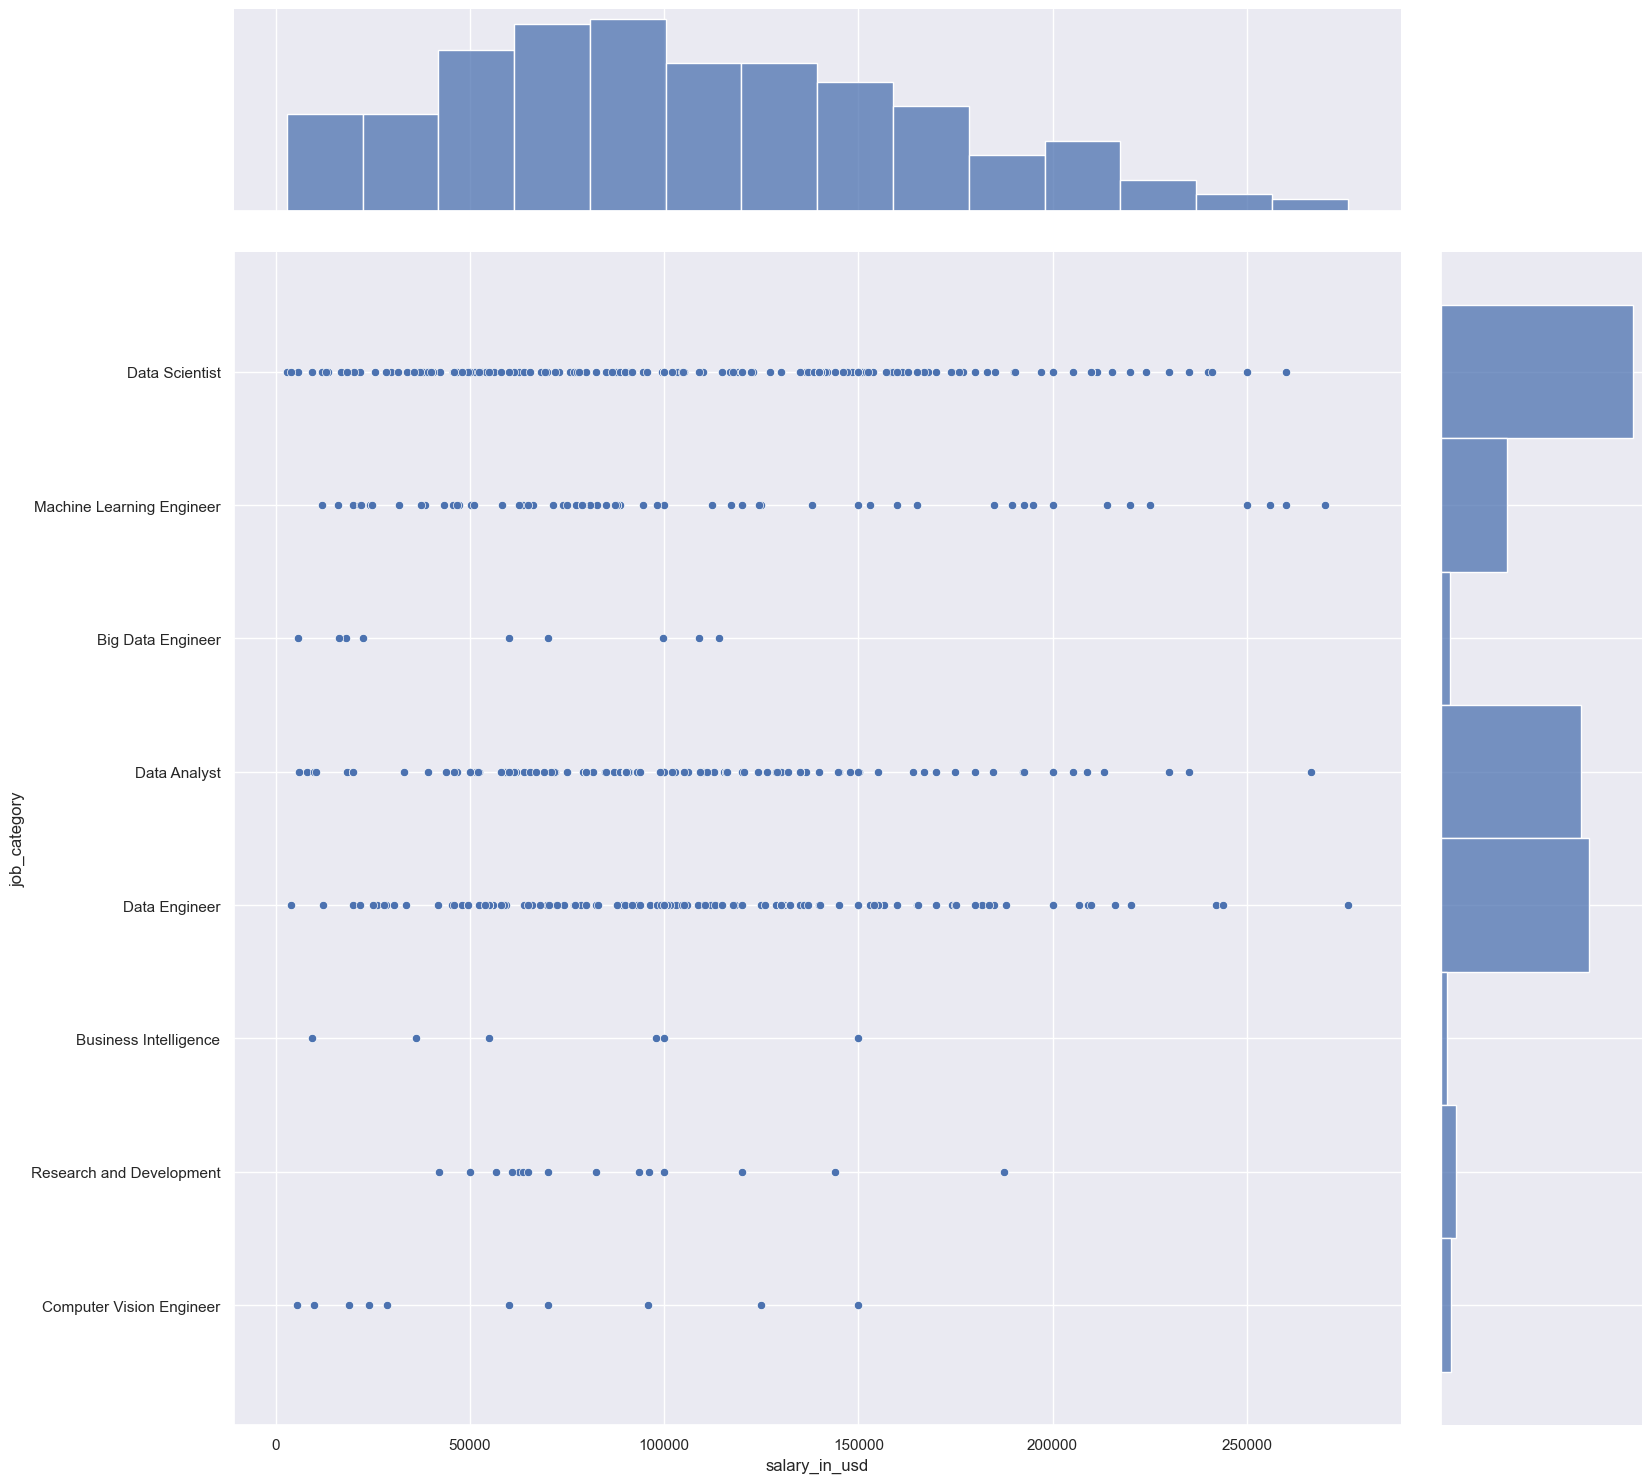

In [39]:
sb.jointplot(data = data_clean, x = "salary_in_usd", y = "job_category", height = 15)

Data of the `job_category` of employees is too spread out, which may cause inaccuracies and skew during modelling. \
`job_category` is **not suitable** to be used as predictor of `salary_in_usd`.

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


experience_level
Senior    277
Mid       210
Entry      88
Expert     22
Name: count, dtype: int64

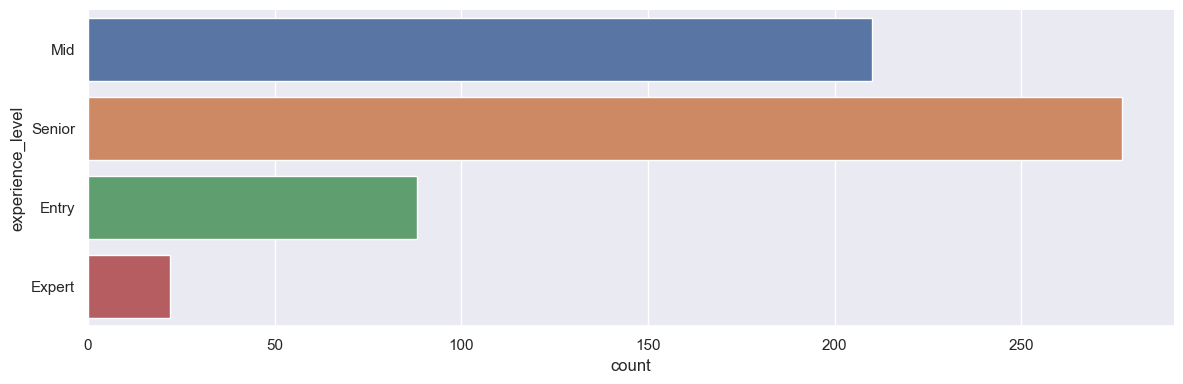

In [40]:
#Distribution of Experience Level
sb.catplot(y = 'experience_level', data = data_clean, kind = "count", height = 4, aspect = 3)
data_clean['experience_level'].value_counts()

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


employment_type
Full-time    579
Part-time     10
Contract       4
Freelance      4
Name: count, dtype: int64

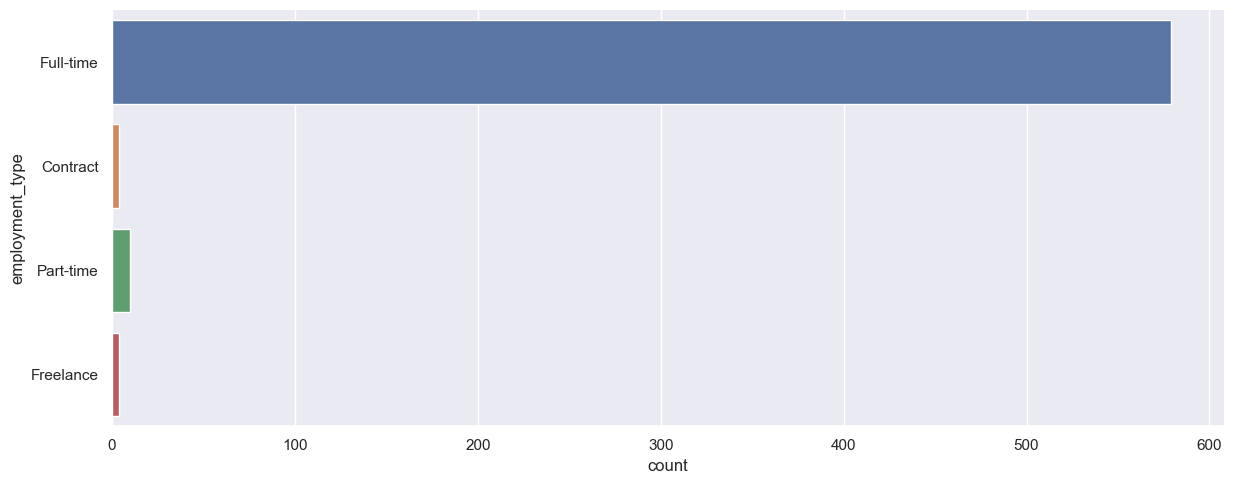

In [41]:
#Distribution of Employment Type
sb.catplot(y = 'employment_type', data = data_clean, kind = "count", height = 5, aspect = 2.5)
data_clean['employment_type'].value_counts()

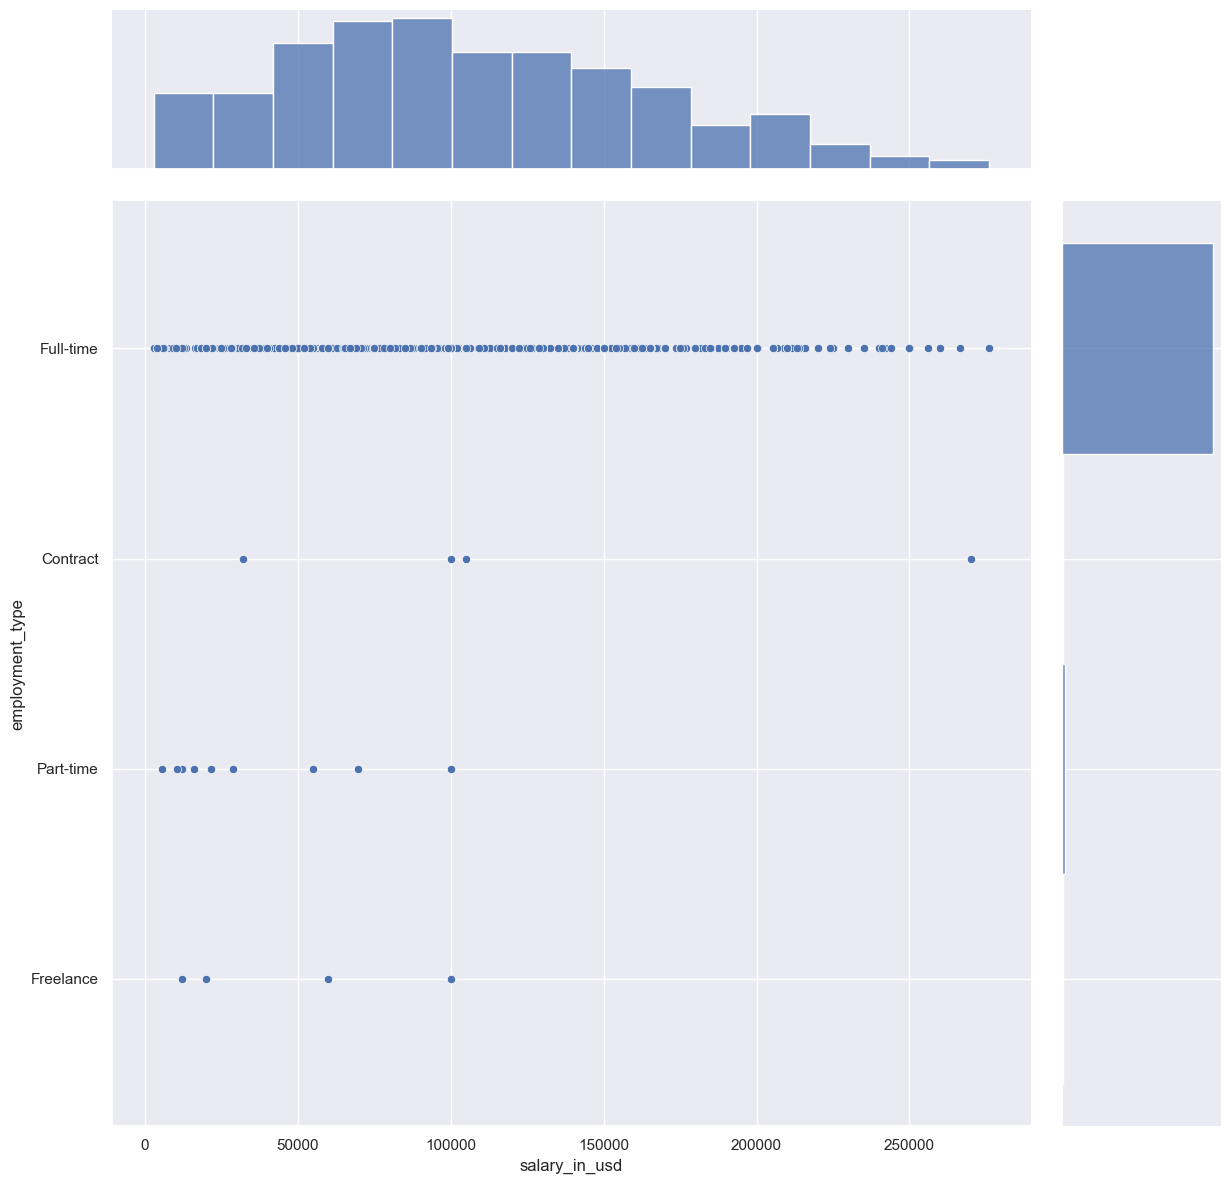

In [42]:
sb.jointplot(data = data_clean, x = "salary_in_usd", y = "employment_type", height = 12)

Data is skewed as a large majority (`579` out of `597`) of the `employment_type` of employees are `Full-time`. \
`employment_type` is **not suitable** to be used as predictor of `salary_in_usd`.

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


remote_ratio
Fully Remote        373
Not Remote          126
Partially Remote     98
Name: count, dtype: int64

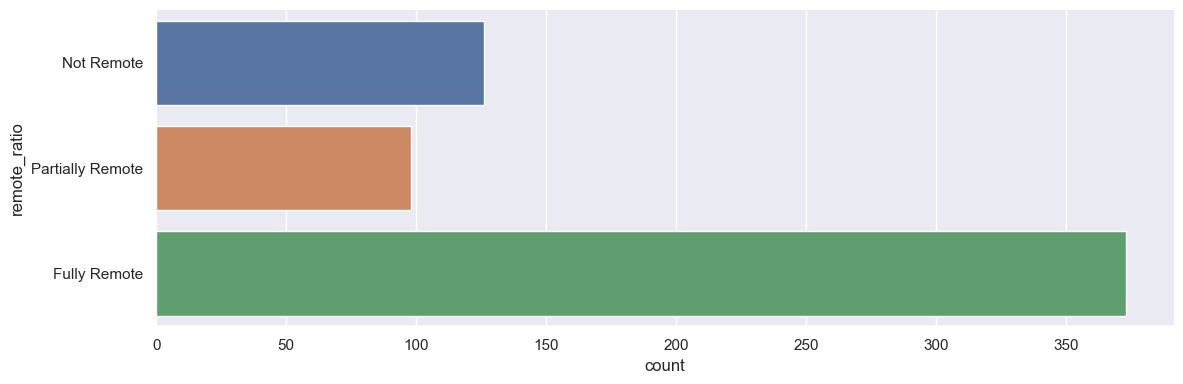

In [43]:
#Distribution of Remote Ratio
sb.catplot(y = 'remote_ratio', data = data_clean, kind = "count", height = 4, aspect = 3)
data_clean['remote_ratio'].value_counts()

C:\Users\junke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


company_size
Medium    324
Large     191
Small      82
Name: count, dtype: int64

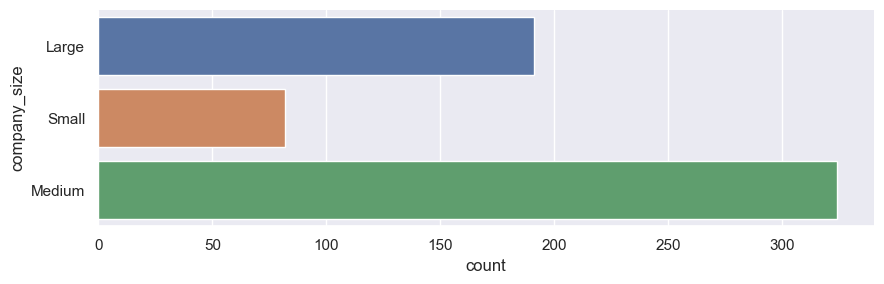

In [44]:
#Distribution of Company Size
sb.catplot(y = 'company_size', data = data_clean, kind = "count", height = 3, aspect = 3)
data_clean['company_size'].value_counts()

### Relationship with `salary_in_usd` and `above_median`

The remaining valid predictors are `experience_level`, `remote_ratio` and `company_size`.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

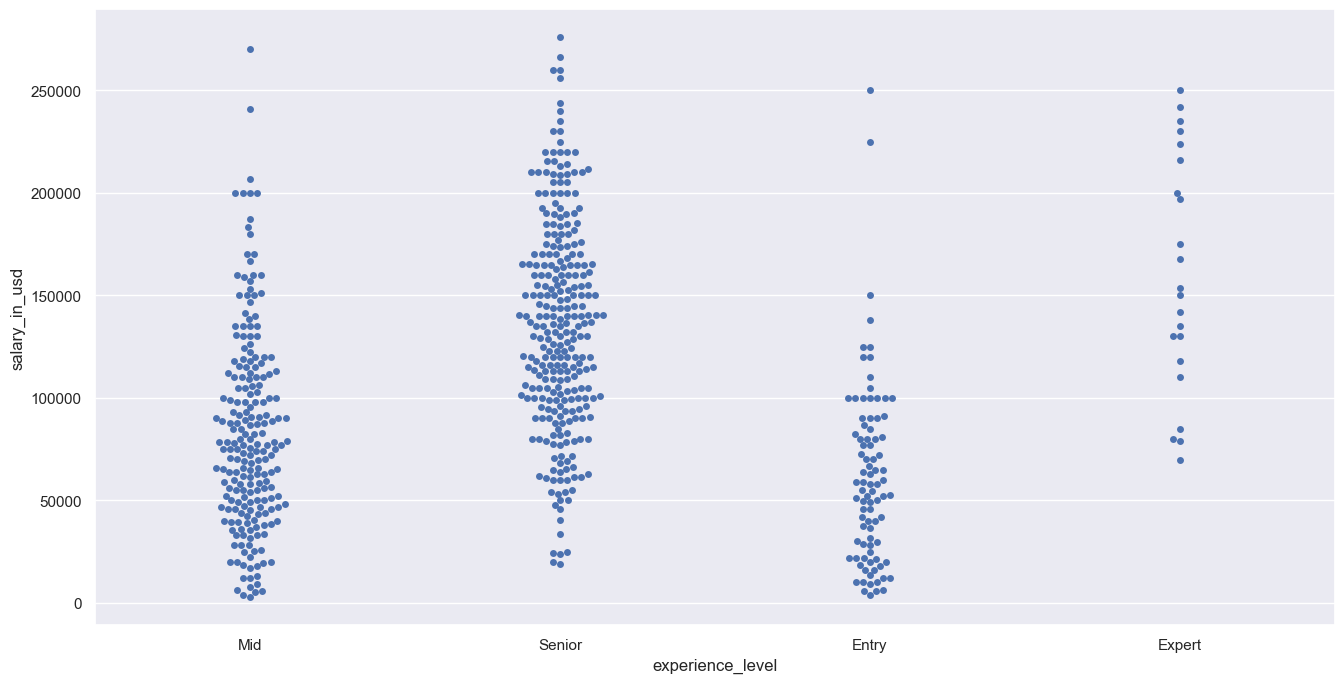

In [45]:
#Relationship between Salary (USD) and Experience Level
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'experience_level', y = 'salary_in_usd', data = data_clean)

<Axes: xlabel='experience_level', ylabel='above_median'>

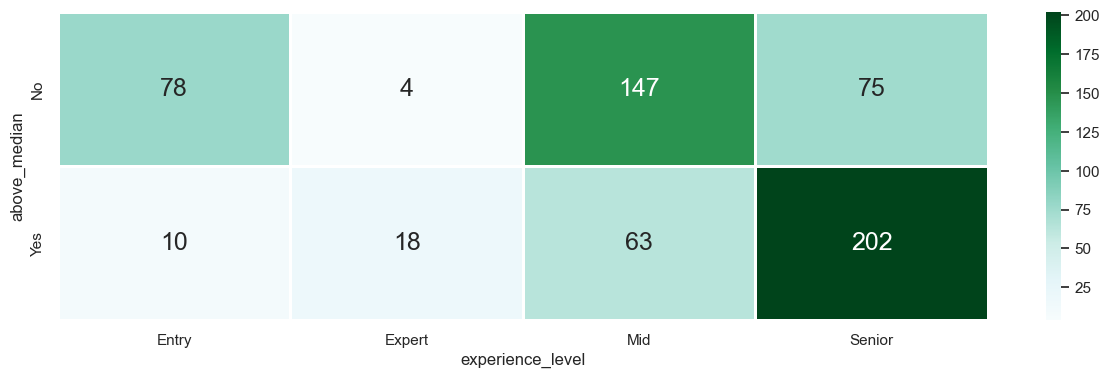

In [46]:
#Relationship between whether receiving Above Median Salary (USD) and Experience Level
f = plt.figure(figsize=(15, 4))
sb.heatmap(data_clean.groupby(['above_median', 'experience_level']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

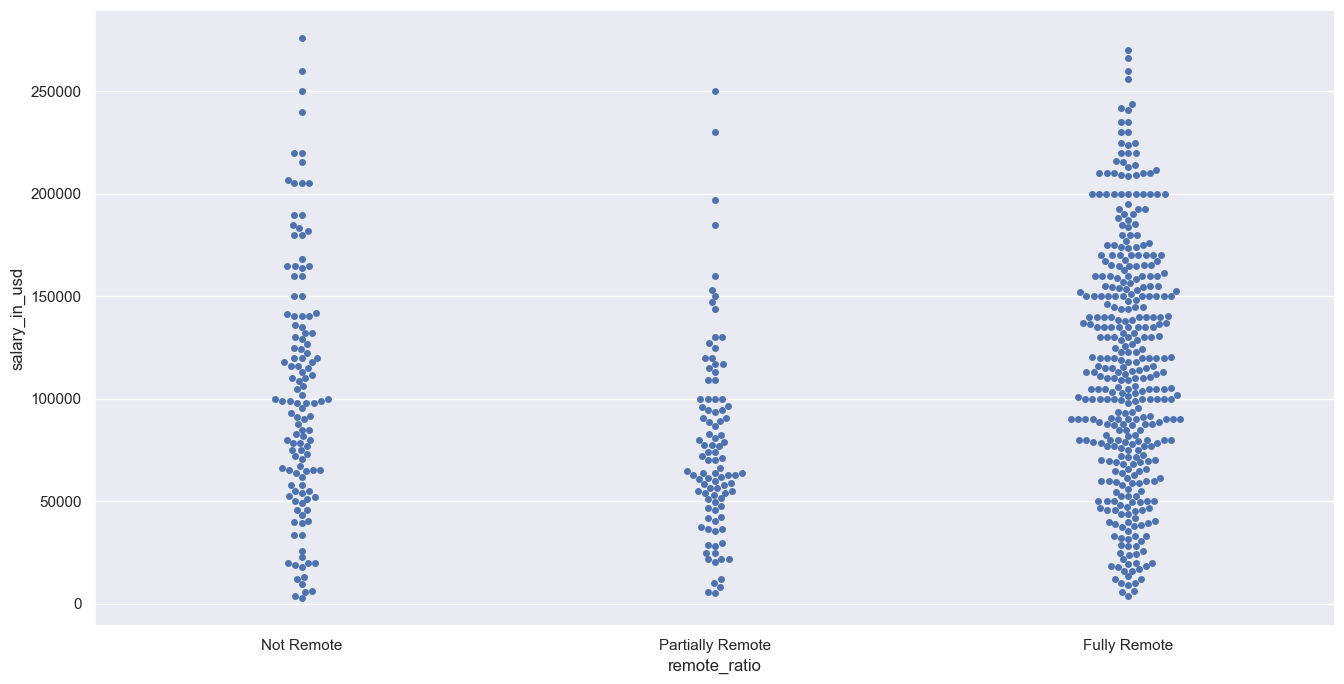

In [47]:
#Relationship between Salary (USD) and Remote Ratio
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'remote_ratio', y = 'salary_in_usd', data = data_clean)

<Axes: xlabel='remote_ratio', ylabel='above_median'>

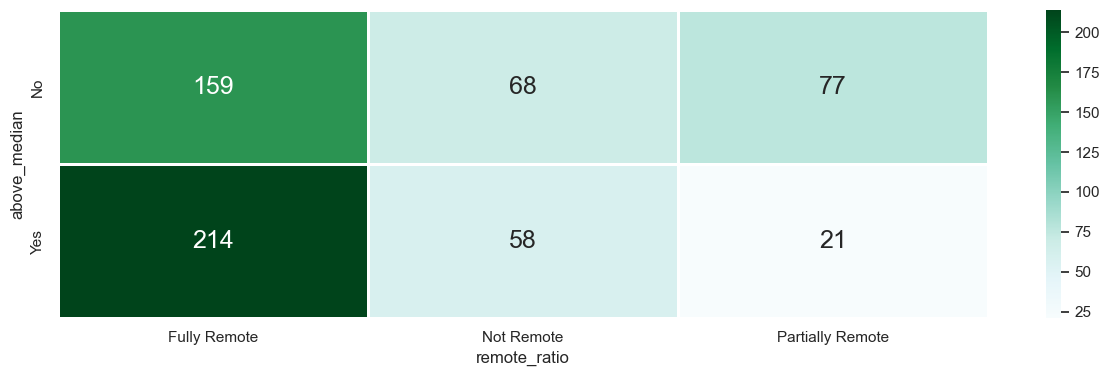

In [48]:
#Relationship between whether receiving Above Median Salary (USD) and Remote Ratio
f = plt.figure(figsize=(15, 4))
sb.heatmap(data_clean.groupby(['above_median', 'remote_ratio']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

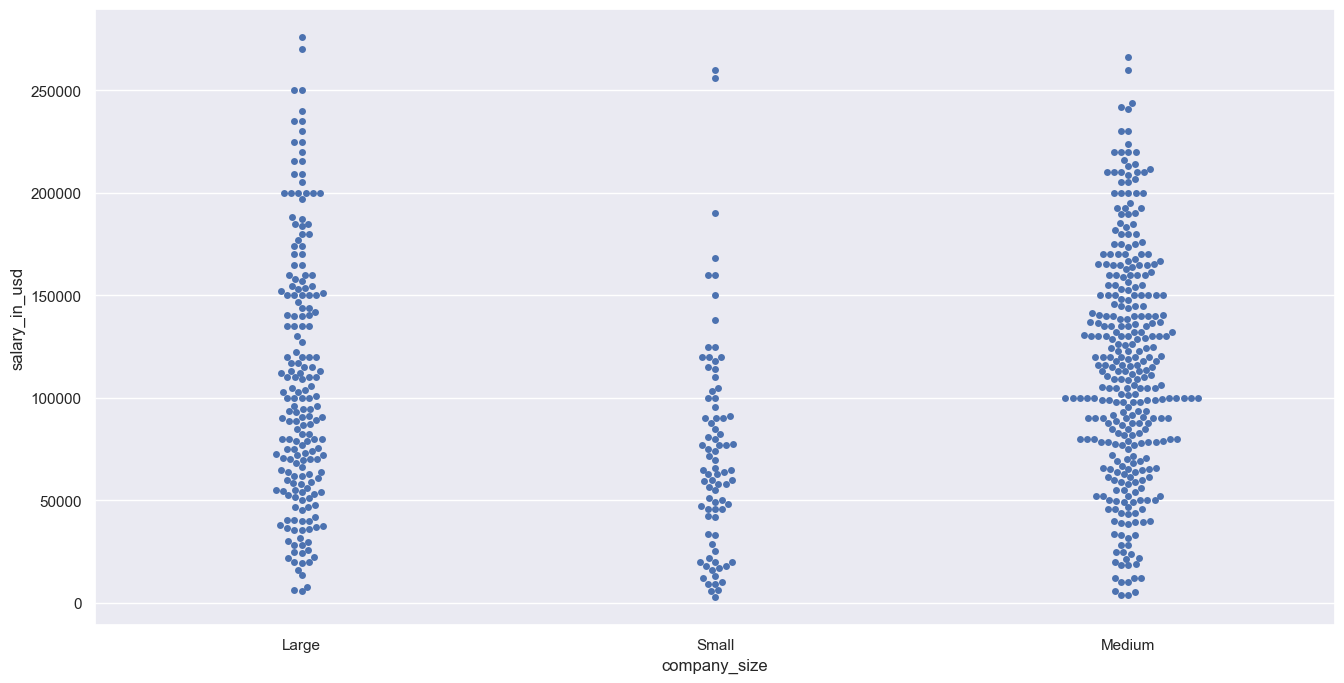

In [49]:
#Relationship between Salary (USD) and Company Size
f = plt.figure(figsize=(16, 8))
sb.swarmplot(x = 'company_size', y = 'salary_in_usd', data = data_clean)

<Axes: xlabel='company_size', ylabel='above_median'>

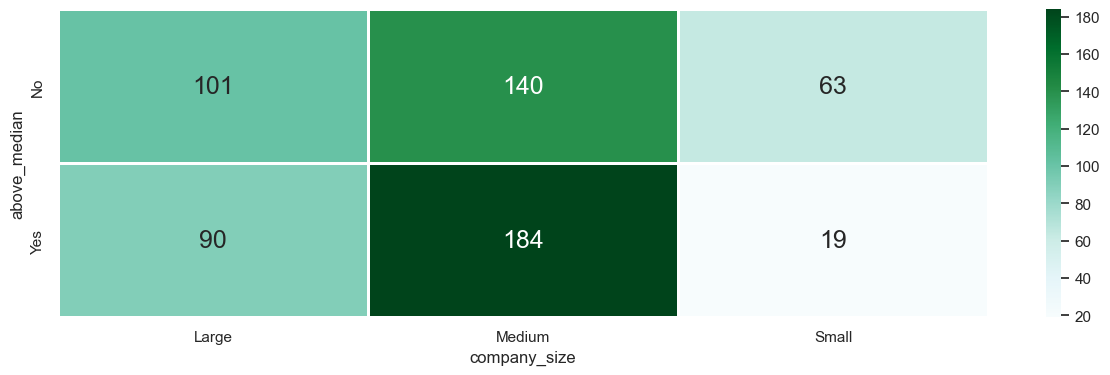

In [50]:
#Relationship between whether receiving Above Median Salary (USD) and Company Size
f = plt.figure(figsize=(15, 4))
sb.heatmap(data_clean.groupby(['above_median', 'company_size']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

---

# Data Modelling

We will now try to find the most suitable model to predict whether employee salary (USD) is `above_median`.

The response variable and predictors used will be added into dataframe `joint`.

In [51]:
joint = pd.concat([data_clean['above_median'], data_clean['experience_level'], data_clean['remote_ratio'], data_clean['company_size']], axis = 1).reindex(salary.index)
joint

,above_median,experience_level,remote_ratio,company_size
0,No,Mid,Not Remote,Large
1,Yes,Senior,Not Remote,Small
2,Yes,Senior,Partially Remote,Medium
3,No,Mid,Not Remote,Small
4,Yes,Senior,Partially Remote,Large
...,...,...,...,...
602,Yes,Senior,Fully Remote,Medium
603,Yes,Senior,Fully Remote,Medium
604,Yes,Senior,Not Remote,Medium
605,Yes,Senior,Fully Remote,Medium


### Encode Data

In [52]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
joint_cat = joint[['experience_level', 'remote_ratio', 'company_size']]
ohe.fit(joint_cat)
joint_cat_ohe = pd.DataFrame(ohe.transform(joint_cat).toarray(), 
                                  columns = ohe.get_feature_names_out(joint_cat.columns))

# Check the encoded variables
joint_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   experience_level_Entry         597 non-null    float64
 1   experience_level_Expert        597 non-null    float64
 2   experience_level_Mid           597 non-null    float64
 3   experience_level_Senior        597 non-null    float64
 4   remote_ratio_Fully Remote      597 non-null    float64
 5   remote_ratio_Not Remote        597 non-null    float64
 6   remote_ratio_Partially Remote  597 non-null    float64
 7   company_size_Large             597 non-null    float64
 8   company_size_Medium            597 non-null    float64
 9   company_size_Small             597 non-null    float64
dtypes: float64(10)
memory usage: 46.8 KB


In [53]:
joint_res = joint['above_median']
joint_ohe = pd.concat([joint_cat_ohe.set_axis(joint_res.index), joint_res], 
                           sort = False, axis = 1).reindex(index = joint_res.index)

# Check the final dataframe
joint_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   experience_level_Entry         597 non-null    float64
 1   experience_level_Expert        597 non-null    float64
 2   experience_level_Mid           597 non-null    float64
 3   experience_level_Senior        597 non-null    float64
 4   remote_ratio_Fully Remote      597 non-null    float64
 5   remote_ratio_Not Remote        597 non-null    float64
 6   remote_ratio_Partially Remote  597 non-null    float64
 7   company_size_Large             597 non-null    float64
 8   company_size_Medium            597 non-null    float64
 9   company_size_Small             597 non-null    float64
 10  above_median                   597 non-null    object 
dtypes: float64(10), object(1)
memory usage: 56.0+ KB


## Model 1: Binary Classification

[Text(0.5431034482758621, 0.9, 'experience_level_Senior <= 0.5\ngini = 0.5\nsamples = 477\nvalue = [236, 241]\nclass = No'),
 Text(0.27586206896551724, 0.7, 'experience_level_Expert <= 0.5\ngini = 0.401\nsamples = 245\nvalue = [177, 68]\nclass = Yes'),
 Text(0.13793103448275862, 0.5, 'remote_ratio_Partially Remote <= 0.5\ngini = 0.363\nsamples = 227\nvalue = [173, 54]\nclass = Yes'),
 Text(0.06896551724137931, 0.3, 'company_size_Small <= 0.5\ngini = 0.407\nsamples = 176\nvalue = [126, 50]\nclass = Yes'),
 Text(0.034482758620689655, 0.1, 'gini = 0.436\nsamples = 140\nvalue = [95, 45]\nclass = Yes'),
 Text(0.10344827586206896, 0.1, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]\nclass = Yes'),
 Text(0.20689655172413793, 0.3, 'company_size_Large <= 0.5\ngini = 0.145\nsamples = 51\nvalue = [47, 4]\nclass = Yes'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = Yes'),
 Text(0.2413793103448276, 0.1, 'gini = 0.278\nsamples = 24\nvalue = [20, 4]\nclass = Yes'),

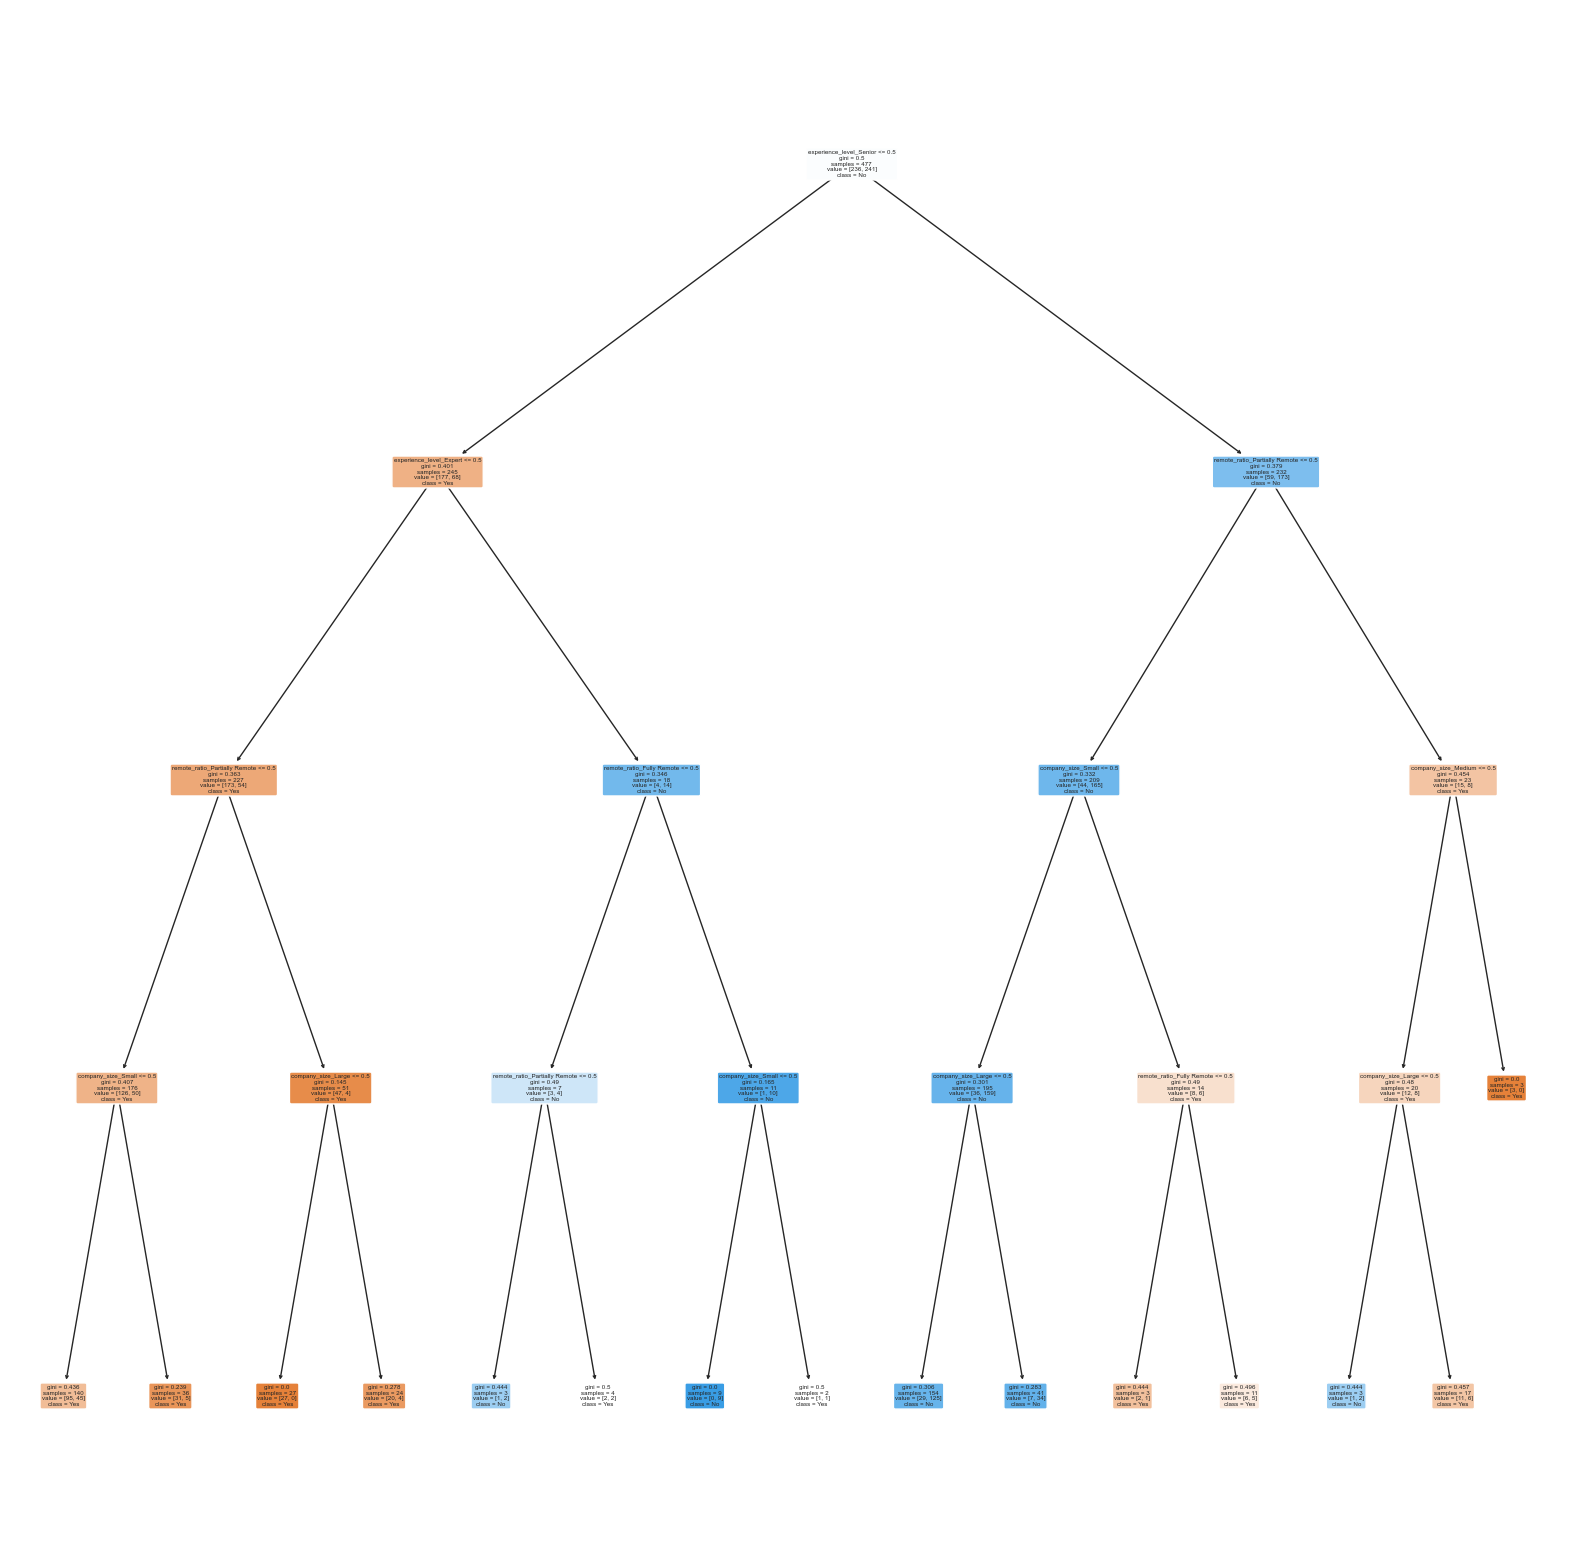

In [54]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(joint_ohe['above_median'])
X = pd.DataFrame(joint_ohe.drop('above_median', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                

# Plot the trained Decision Tree
f = plt.figure(figsize = (20, 20))
plot_tree(dectree, filled = True, rounded = True, 
          feature_names = X_train.columns.tolist(),
          class_names = ['Yes', 'No'])
          

Train Data
Accuracy  :	 0.7756813417190775

TPR Train :	 0.7136929460580913
TNR Train :	 0.8389830508474576

FPR Train :	 0.16101694915254236
FNR Train :	 0.2863070539419087


<Axes: >

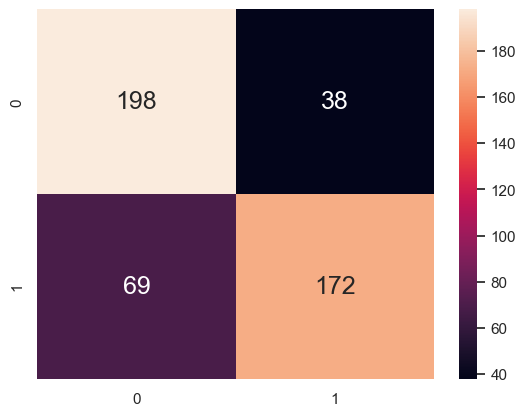

In [55]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tnTrain = cmTrain[0][0] # True Negatives 
fpTrain = cmTrain[0][1] # False Positives 
fnTrain = cmTrain[1][0] # False Negatives 
tpTrain = cmTrain[1][1] # True Positives 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6916666666666667

TPR Test :	 0.5384615384615384
TNR Test :	 0.8088235294117647

FPR Test :	 0.19117647058823528
FNR Test :	 0.46153846153846156


<Axes: >

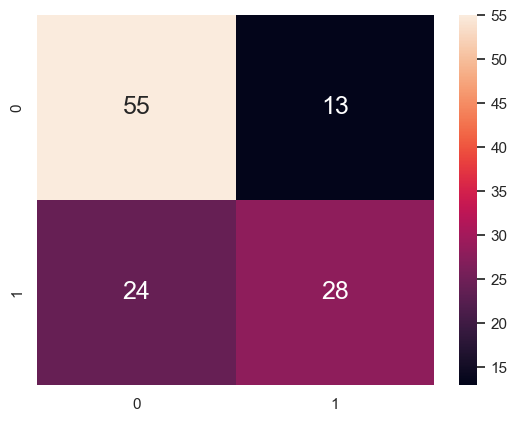

In [56]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tnTest = cmTest[0][0] # True Negatives
fpTest = cmTest[0][1] # False Positives
fnTest = cmTest[1][0] # False Negatives
tpTest = cmTest[1][1] # True Positives

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

To increase the accuracy, we did some upsampling to balance out the values of `above_median`

In [57]:
# Upsample Yes to match No
from sklearn.utils import resample

jointNo = joint_ohe[joint_ohe.above_median == 'No']
jointYes = joint_ohe[joint_ohe.above_median == 'Yes']
 
jointYes_up = resample(jointYes, 
                        replace = True,                     # sample with replacement
                        n_samples = jointNo.shape[0])    
 
# Combine the two classes back after upsampling
joint_ohe_up = pd.concat([jointNo, jointYes_up])
 
# Check the ratio of the classes
joint_ohe_up['above_median'].value_counts()

above_median
No     304
Yes    304
Name: count, dtype: int64

In [58]:
joint_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 158
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   experience_level_Entry         608 non-null    float64
 1   experience_level_Expert        608 non-null    float64
 2   experience_level_Mid           608 non-null    float64
 3   experience_level_Senior        608 non-null    float64
 4   remote_ratio_Fully Remote      608 non-null    float64
 5   remote_ratio_Not Remote        608 non-null    float64
 6   remote_ratio_Partially Remote  608 non-null    float64
 7   company_size_Large             608 non-null    float64
 8   company_size_Medium            608 non-null    float64
 9   company_size_Small             608 non-null    float64
 10  above_median                   608 non-null    object 
dtypes: float64(10), object(1)
memory usage: 57.0+ KB


[Text(0.54, 0.9, 'experience_level_Senior <= 0.5\ngini = 0.499\nsamples = 486\nvalue = [252, 234]\nclass = Yes'),
 Text(0.3, 0.7, 'experience_level_Expert <= 0.5\ngini = 0.407\nsamples = 264\nvalue = [189, 75]\nclass = Yes'),
 Text(0.16, 0.5, 'company_size_Small <= 0.5\ngini = 0.355\nsamples = 243\nvalue = [187, 56]\nclass = Yes'),
 Text(0.08, 0.3, 'experience_level_Entry <= 0.5\ngini = 0.402\nsamples = 197\nvalue = [142, 55]\nclass = Yes'),
 Text(0.04, 0.1, 'gini = 0.441\nsamples = 149\nvalue = [100, 49]\nclass = Yes'),
 Text(0.12, 0.1, 'gini = 0.219\nsamples = 48\nvalue = [42, 6]\nclass = Yes'),
 Text(0.24, 0.3, 'remote_ratio_Fully Remote <= 0.5\ngini = 0.043\nsamples = 46\nvalue = [45, 1]\nclass = Yes'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = Yes'),
 Text(0.28, 0.1, 'gini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = Yes'),
 Text(0.44, 0.5, 'company_size_Small <= 0.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]\nclass = No'),
 Text(0.4, 0.3, 'remote_ra

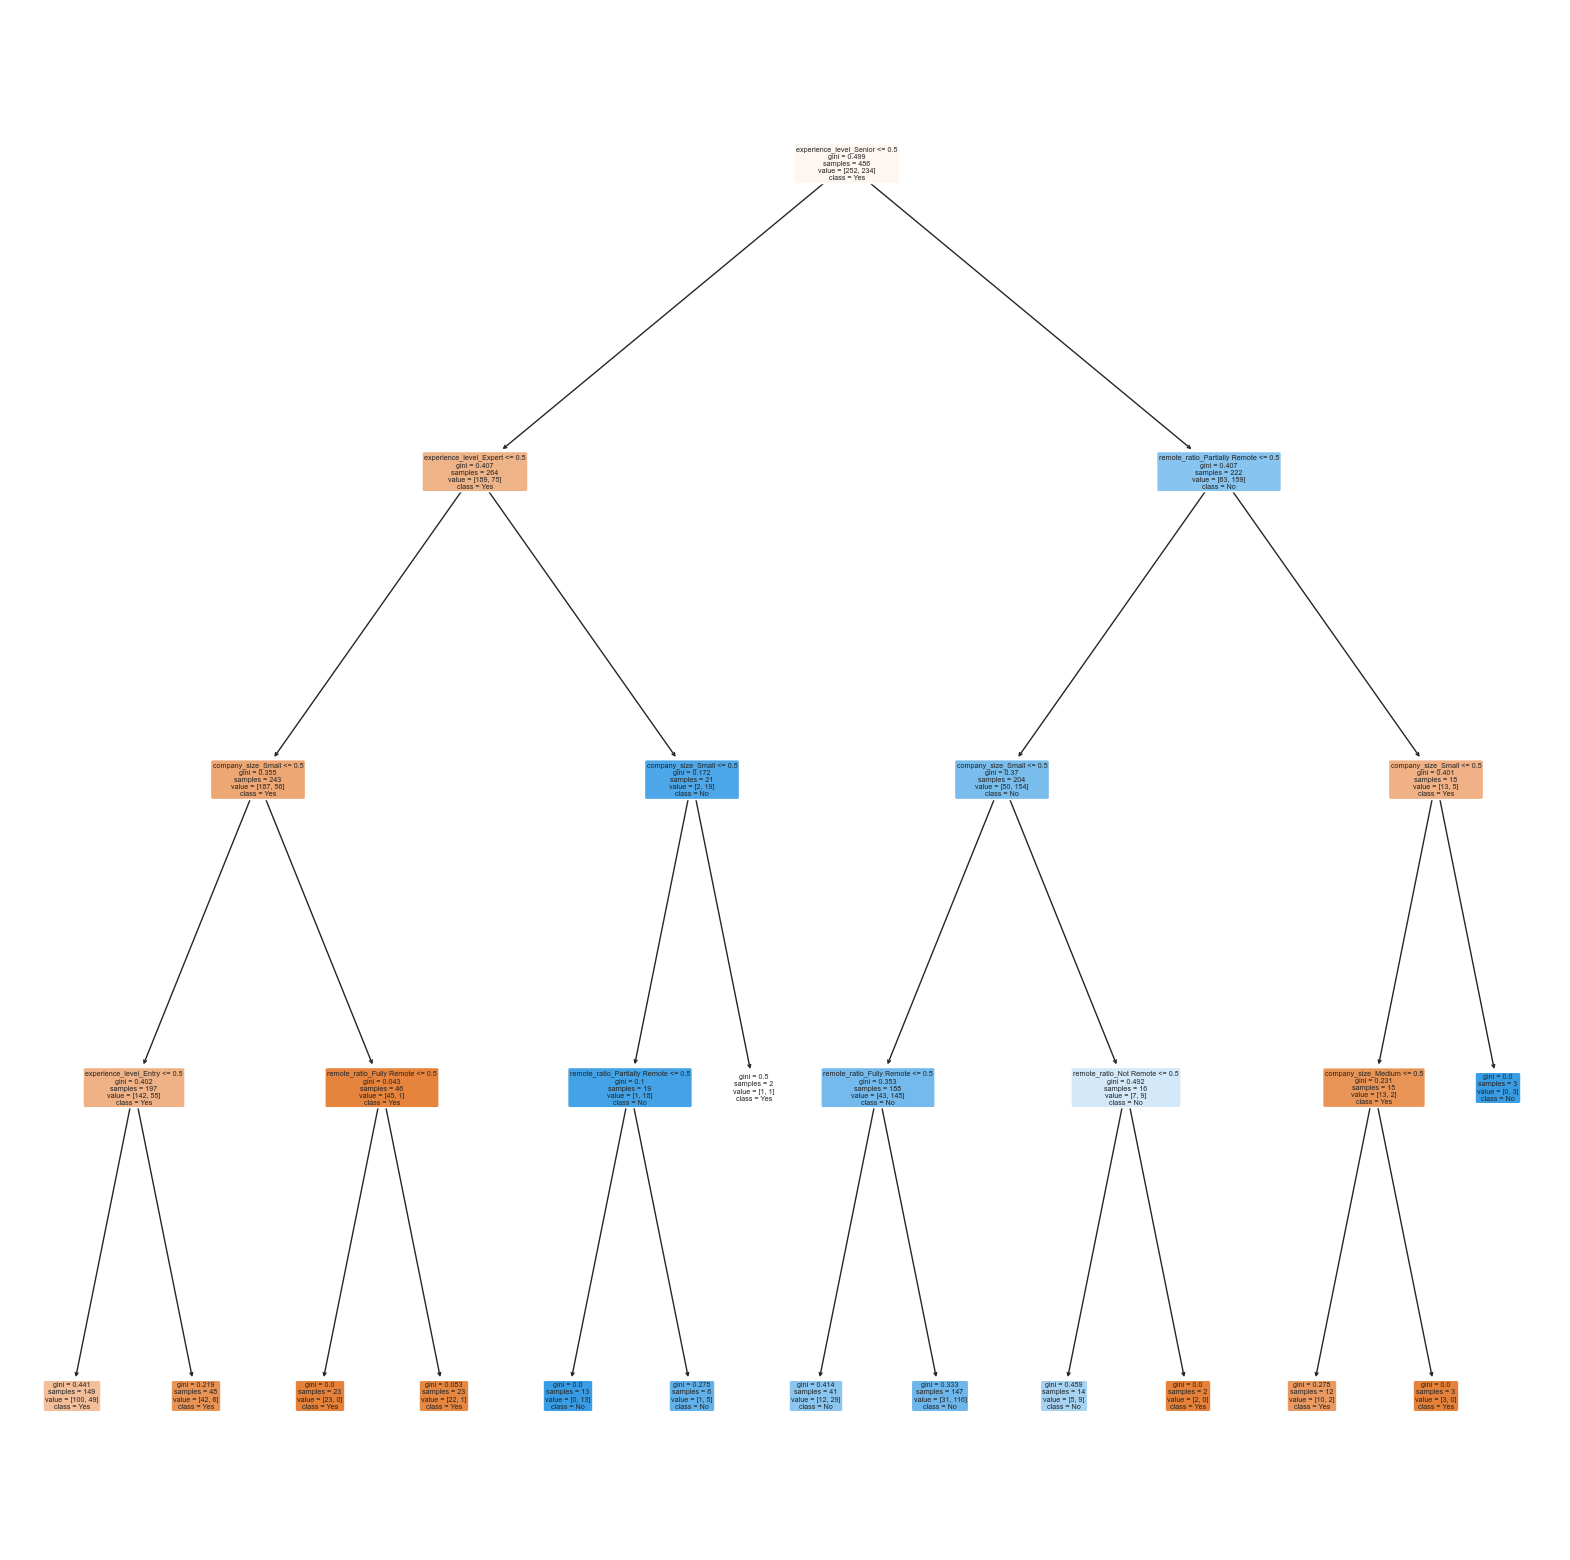

In [59]:
#Fit and Plot the Decision Tree again
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y = pd.DataFrame(joint_ohe_up['above_median'])
X = pd.DataFrame(joint_ohe_up.drop('above_median', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                  

f = plt.figure(figsize = (20, 20))
plot_tree(dectree, filled = True, rounded = True, 
          feature_names = X_train.columns.tolist(), 
          class_names = ["Yes","No"])

Train Data
Accuracy  :	 0.7777777777777778

TPR Train :	 0.7478632478632479
TNR Train :	 0.8055555555555556

FPR Train :	 0.19444444444444445
FNR Train :	 0.25213675213675213


<Axes: >

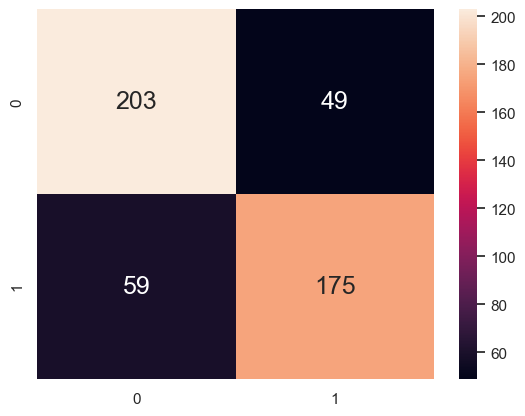

In [60]:
#Analyse the Train Data again
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

Test Data
Accuracy  :	 0.7295081967213115

TPR Test :	 0.6857142857142857
TNR Test :	 0.7884615384615384

FPR Test :	 0.21153846153846154
FNR Test :	 0.3142857142857143


<Axes: >

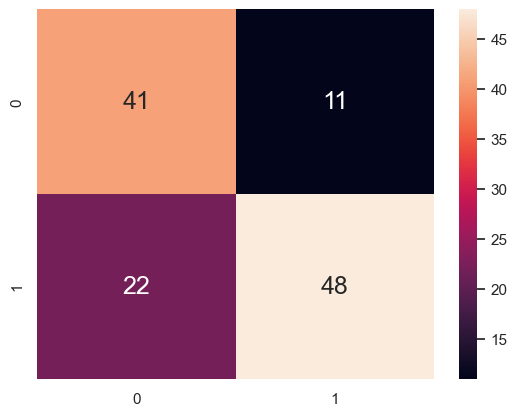

In [61]:
#Analyse the Test Data again
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

**Accuracy of Binary Classification Model: 72.95%**

## Model 2: Random Forest

In [62]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(joint_ohe_up['above_median'])
X = pd.DataFrame(joint_ohe_up.drop('above_median', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 300,    #Number of trees set to 300
                                 max_depth = 5)         #Max depth set to 5

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.above_median.ravel())

RandomForestClassifier(max_depth=5, n_estimators=300)

Train Data
Accuracy  :	 0.7551440329218106

TPR Train :	 0.7051282051282052
TNR Train :	 0.8015873015873016

FPR Train :	 0.1984126984126984
FNR Train :	 0.2948717948717949


<Axes: >

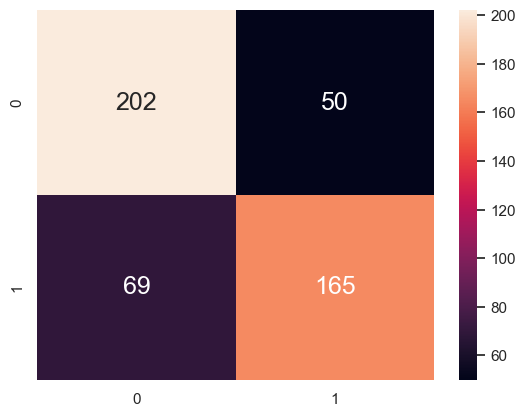

In [64]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives 
fpTrain = cmTrain[0][1] # False Positives 
tnTrain = cmTrain[0][0] # True Negatives 
fnTrain = cmTrain[1][0] # False Negatives 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.819672131147541

TPR Test :	 0.8142857142857143
TNR Test :	 0.8269230769230769

FPR Test :	 0.17307692307692307
FNR Test :	 0.18571428571428572


<Axes: >

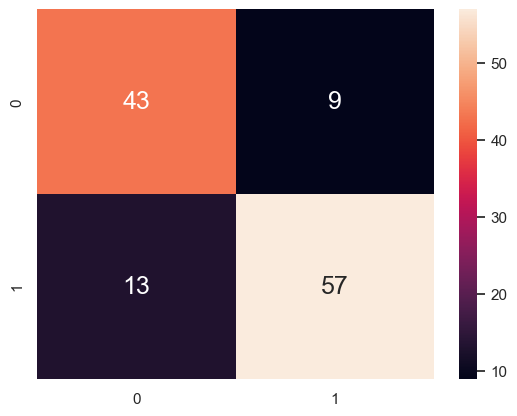

In [65]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives 
fpTest = cmTest[0][1] # False Positives 
tnTest = cmTest[0][0] # True Negatives 
fnTest = cmTest[1][0] # False Negatives 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(tnTest + fpTest)))
print("FNR Test :\t", (fnTest/(tpTest + fnTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Accuracy of Random Forest model: 81.97%**

## Model 3: Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming DataFrame with features (X) and target variable (y)
# X = predictors, y = responding variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7540983606557377
Classification Report:
              precision    recall  f1-score   support

          No       0.73      0.78      0.75        58
         Yes       0.78      0.73      0.76        64

    accuracy                           0.75       122
   macro avg       0.75      0.76      0.75       122
weighted avg       0.76      0.75      0.75       122



C:\Users\junke\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Data
Accuracy  :	 0.7366255144032922

TPR Train :	 0.4625
TNR Train :	 0.5772357723577236

FPR Train :	 0.42276422764227645
FNR Train :	 0.5375


<Axes: >

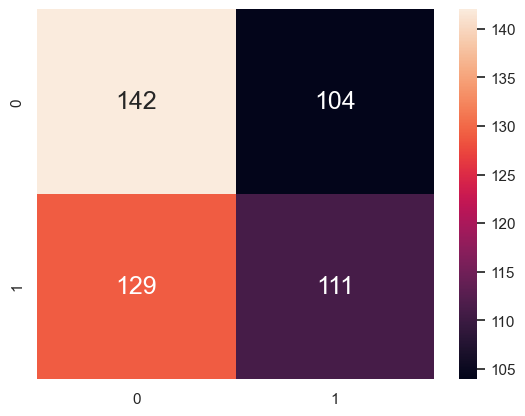

In [67]:
print("Train Data")
print("Accuracy  :\t", logreg.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives 
fpTrain = cmTrain[0][1] # False Positives 
tnTrain = cmTrain[0][0] # True Negatives 
fnTrain = cmTrain[1][0] # False Negatives 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7540983606557377

TPR Test :	 0.625
TNR Test :	 0.5517241379310345

FPR Test :	 0.4482758620689655
FNR Test :	 0.375


<Axes: >

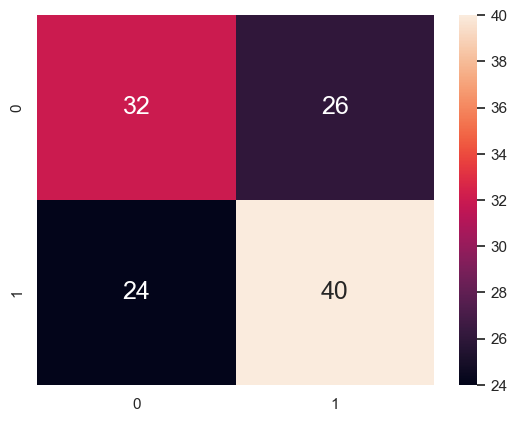

In [68]:
print("Test Data")
print("Accuracy  :\t", logreg.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives 
fpTest = cmTest[0][1] # False Positives 
tnTest = cmTest[0][0] # True Negatives 
fnTest = cmTest[1][0] # False Negatives 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Accuracy of Logistic Regression Model: 75.41%**

---

# Conclusion

Accuracy: 
- `Binary Classification`: **72.95%**
- `Random Forest`: **81.97%**
- `Logistic Regression`: **75.41%**
    
`Random Forest` model is the **more suitable model** to predict whether the salary (USD) of a Data Science Professional is `above median` salary (USD) based on `experience_level`, `remote_ratio` and `company_size` as the model has **higher accuracy**.